

Para ejecutar el siguiente notebook con bloques independientes, solo es necesario el cargar el set de datos para la tarea. Luego, solo se deben de ejecutar los bloques de manera ordenada y descendente .



In [ ]:
#LIBRERIAS GENERAL
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#LIBRERIAS PARA MANEJO DE DIRECTORIOS CON CARPETAS DE OBSEVACIONES
import zipfile
import csv

import glob
import os.path
#LIBRERIA PARA DESARROLLO DEL FILTRO DE BUTTERWORTH
from scipy import signal
# #METODO DE SELECCCION DE CARRCATERISTICAS
#LIBRERIA PARA MEDIR TIEMPOS DE ENTRENAMIENTO Y COMMPUTO PARA CONJUUNTO DE PRUEBA
from time import time
from sklearn.preprocessing import normalize 
#LIBRERIAS PARA MEDICION DE METRICAS, REDUCCION DE DIMENSIONALIDAD POR VARIABILIDAD Y STANDARSCALER
from sklearn import metrics
from sklearn.metrics import accuracy_score
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [ ]:
#@tf.function
#def my_function(x):
#  y = 2 * x
#  return y

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
import seaborn as sns
from math import floor, ceil
from pylab import rcParams

%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
#LISTADO DE FUNCIONES
#FILTRO BUTTERWORTH
def butter_lowpass(cutoff, nyq_freq, order=2):
    normal_cutoff = float(cutoff) / nyq_freq
    b, a = signal.butter(order, normal_cutoff, btype='lowpass')
    return b, a
def butter_lowpass_filter(data, cutoff_freq, nyq_freq, order=4):
    b, a = butter_lowpass(cutoff_freq, nyq_freq, order=order)
    y = signal.filtfilt(b, a, data)
    return y
#SKEWNESS
def skew(y):
    n=np.size(y)
    mean=np.mean(y)
    num=((1/n)*np.sum((y-mean)**3))
    den=(((1/n)*np.sum((y-mean)**2))**(3/2))
    return num/den    
#funcion para truncar decimales
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier
#KURTOSIS
def kurt(y):
    n=np.size(y)
    means=np.mean(y)
    num=(1/n)*np.sum((y-means)**4)
    den=((1/n)*np.sum((y-means)**2))**2
    return (num/den)-3
#MINIMUM
def Minimum(y):
    r=np.amin(y, axis=0)
    return r 
#MAXIMUM
def Maximum(y):
    r=np.amax(y, axis=0)
    return r 
#RANGE
def Range(y):
    r_max=np.amax(y, axis=0)
    r_min=np.amin(y, axis=0)
    r=r_max-r_min
    return r 
#MEAN CROSSING RATE
def Mean_crossing_rate(y):
    r=np.where(np.diff(np.signbit(y)))[0]
    return r  
#RMS
def Rms(y):
    sum = 0
    for i in range(0, len(y)):
        sum += (y[i]**2)
    return np.sqrt(sum/len(y))
#VARIANCE
def Variance(y):
    n=np.size(y)
    means=np.mean(y)
    sigma2=(1/n)*np.sum((y-means)**2)
    return sigma2
#MEAN
def Mean(y):
    n=np.size(y)
    m=(1/n)*np.sum(y)
    return m 
#AVERAGE MAGNITUDE AREA
def avg_Energy_Area(y1,y2,y3):
    n=np.size(y1)
    SMA_x=(1/n)*np.sum(np.abs(y1**1)+np.abs(y2**2)+np.abs(y3**3))
    return SMA_x    
#AVERAGE ENERGY EXPENDITURE 
def avg_Enrgy_Expnd(y1,y2,y3):
    n=np.size(y1)
    EE_x=(1/n)*np.sum(np.sqrt((y1**2)+(y2**2)+(y3**2)))
    return EE_x
#FUNCION MATRIZ CORRELACION
def R(X):
    n=X.shape
    r=np.zeros((n[1],n[1]))
    X_mean=np.zeros(n[1])
    X_var=np.zeros(n[1])
    for i in range(0,n[1]):
        X_mean[i]=np.mean(X[:,i])
        X_var[i]=np.sum(((X[:,i]-X_mean[i])**2)/(n[1]))
    for i in range(0,n[1]):
        for j in range(0,n[1]):
            r[i,j]=(np.sum((X[:,i] - X_mean[i]) * (X[:,j] - X_mean[j]))/n[1])/(np.sqrt(X_var[i])*np.sqrt(X_var[j]))    
    return r

def Plot_Sensor_Signal(d_m):
    List_trains_D=[]
    for k in range(0,len(d_m)):
        names=['X'+str(i) for i in range(0,9)]
        trainD = pd.read_csv(d_m[k],names=names)
        List_trains_D.append(trainD.to_numpy())
    return List_trains_D  #LISTA CON SENSORES FILTRADOS Y CON RUIDO(ORIGINAL)


In [ ]:
random_state = 42
np.random.seed(random_state)
#tf.set_random_seed(random_state)#RESIDUO ALETORIO
tf.random.set_seed(random_state)
#print(np.random.rand(random_state))

In [ ]:
##CARGAR EN COLABORATORY
from google.colab import files
uploaded = files.upload()

Saving Smartphone_Dataset.zip to Smartphone_Dataset.zip


In [ ]:
#CARGAR EL ZIP DE Smartphone_Dataset.zip" 
!unzip Smartphone_Dataset.zip

Archive:  Smartphone_Dataset.zip
   creating: Smartphone_Dataset/
  inflating: Smartphone_Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/Smartphone_Dataset/
  inflating: __MACOSX/Smartphone_Dataset/._.DS_Store  
  inflating: Smartphone_Dataset/format.txt  
  inflating: __MACOSX/Smartphone_Dataset/._format.txt  
   creating: Smartphone_Dataset/S01/
  inflating: Smartphone_Dataset/S01/bike1.csv  
  inflating: Smartphone_Dataset/S01/bike2.csv  
  inflating: Smartphone_Dataset/S01/bike3.csv  
  inflating: Smartphone_Dataset/S01/bike4.csv  
  inflating: Smartphone_Dataset/S01/bike5.csv  
  inflating: Smartphone_Dataset/S01/climbing1.csv  
  inflating: Smartphone_Dataset/S01/climbing2.csv  
  inflating: Smartphone_Dataset/S01/climbing3.csv  
  inflating: Smartphone_Dataset/S01/climbing4.csv  
  inflating: Smartphone_Dataset/S01/climbing5.csv  
  inflating: Smartphone_Dataset/S01/descending1.csv  
  inflating: Smartphone_Dataset/S01/descending2.csv  
  inflating: Smartphone_

In [ ]:
zf = zipfile.ZipFile("Smartphone_Dataset.zip")
#INICIALIZACION DE LA LISTA CON DIRECTORIOS DE LA CARPETA DE "Smartphone_Dataset.zip" PARA LOS S0X
d_M=[]
for info in zf.infolist():
    d_M.append(info.filename) #LISTA CON TODAS LAS MUESTRAS DE LOS SENSORES PARA CADA CLASE
#  GENERACION DE LOS CONJUNTOS DE PRUEBA Y VALIDACION  
#INICIALIZACION DE LAS LISTAS DE PRUEBA Y VALIDACION
d_M_Train_Val=[]
d_M_Test=[]
for k in range(0,len(d_M)):
    #S09 Y S08 PARA PRUEBA
    if 'S09' in d_M[k]:
        d_M_Test.append(d_M[k])
    elif 'S08' in d_M[k]:
        d_M_Test.append(d_M[k])
    #RESTO DE OBSERVACIONES PARA ENTRENAMIENTO Y PRUEBA 
    else:
        d_M_Train_Val.append(d_M[k])

In [ ]:
d_M_Test


['Smartphone_Dataset/S08/',
 'Smartphone_Dataset/S08/bike1.csv',
 'Smartphone_Dataset/S08/bike2.csv',
 'Smartphone_Dataset/S08/bike3.csv',
 'Smartphone_Dataset/S08/bike4.csv',
 'Smartphone_Dataset/S08/bike5.csv',
 'Smartphone_Dataset/S08/climbing1.csv',
 'Smartphone_Dataset/S08/climbing2.csv',
 'Smartphone_Dataset/S08/climbing3.csv',
 'Smartphone_Dataset/S08/climbing4.csv',
 'Smartphone_Dataset/S08/climbing5.csv',
 'Smartphone_Dataset/S08/descending1.csv',
 'Smartphone_Dataset/S08/descending2.csv',
 'Smartphone_Dataset/S08/descending3.csv',
 'Smartphone_Dataset/S08/descending4.csv',
 'Smartphone_Dataset/S08/descending5.csv',
 'Smartphone_Dataset/S08/gymbike1.csv',
 'Smartphone_Dataset/S08/gymbike2.csv',
 'Smartphone_Dataset/S08/gymbike3.csv',
 'Smartphone_Dataset/S08/gymbike4.csv',
 'Smartphone_Dataset/S08/gymbike5.csv',
 'Smartphone_Dataset/S08/jumping1.csv',
 'Smartphone_Dataset/S08/jumping2.csv',
 'Smartphone_Dataset/S08/jumping3.csv',
 'Smartphone_Dataset/S08/jumping4.csv',
 'Smart

In [ ]:
#SEPARACION ENTRENAMIENTO VALIDACION Y PRUEBA IDENTIFICANDO EL TIPO DE ACTIVIDAD REALIZADA(CLASE) #PRUEBA S08 Y S09    
# ENTREBNAMIENTO Y VALIDACION+
#INICIAÑIZACION DE LISTAS CON CADA CONJUNTO DE OBSRVACION DE SENSORES CON RESPECTO A CADA CLASE
d_m_bike=[]    
d_m_climbing=[]    
d_m_gymbike=[]    
d_m_standing=[]
d_m_walking=[]    
d_m_running=[] 
d_m_jumping=[]
d_m_treadmill=[]   
d_m_descending=[]  
L=0
for k in range(0,len(d_M_Train_Val)):
   if 'gymbike' in d_M_Train_Val[k]: 
        d_m_gymbike.append(d_M_Train_Val[k])
   if 'descending' in d_M_Train_Val[k]: 
        d_m_descending.append(d_M_Train_Val[k])
   if 'bike' in d_M_Train_Val[k]: 
        d_m_bike.append(d_M_Train_Val[k])
   if 'climbing' in d_M_Train_Val[k]: 
        d_m_climbing.append(d_M_Train_Val[k])        
   if 'standing' in d_M_Train_Val[k]: 
        d_m_standing.append(d_M_Train_Val[k])        
   if 'walking' in d_M_Train_Val[k]: 
        d_m_walking.append(d_M_Train_Val[k])        
   if 'running' in d_M_Train_Val[k]: 
        d_m_running.append(d_M_Train_Val[k])        
   if 'jumping' in d_M_Train_Val[k]: 
        d_m_jumping.append(d_M_Train_Val[k])        
   if 'treadmill' in d_M_Train_Val[k]: 
        d_m_treadmill.append(d_M_Train_Val[k])        
   else:
       L=L+1          
posicion=0
while posicion<len(d_m_bike):
    if 'gymbike' in d_m_bike[posicion]:
        d_m_bike.pop(posicion)
    else:
        posicion=posicion+1
#  PRUEBA
d_m_bike_Test=[]    
d_m_climbing_Test=[]    
d_m_gymbike_Test=[]    
d_m_standing_Test=[]
d_m_walking_Test=[]    
d_m_running_Test=[] 
d_m_jumping_Test=[]
d_m_treadmill_Test=[]   
d_m_descending_Test=[]        
L=0
for k in range(0,len(d_M_Test)):
   if 'gymbike' in d_M_Test[k]: 
        d_m_gymbike_Test.append(d_M_Test[k])
   if 'descending' in d_M_Test[k]: 
        d_m_descending_Test.append(d_M_Test[k])
   if 'bike' in d_M_Test[k]: 
        d_m_bike_Test.append(d_M_Test[k])
   if 'climbing' in d_M_Test[k]: 
        d_m_climbing_Test.append(d_M_Test[k])        
   if 'standing' in d_M_Test[k]: 
        d_m_standing_Test.append(d_M_Test[k])        
   if 'walking' in d_M_Test[k]: 
        d_m_walking_Test.append(d_M_Test[k])        
   if 'running' in d_M_Test[k]: 
        d_m_running_Test.append(d_M_Test[k])        
   if 'jumping' in d_M_Test[k]: 
        d_m_jumping_Test.append(d_M_Test[k])        
   if 'treadmill' in d_M_Test[k]: 
        d_m_treadmill_Test.append(d_M_Test[k])        
   else:
       L=L+1          
posicion=0
while posicion<len(d_m_bike_Test):
    if 'gymbike' in d_m_bike_Test[posicion]:
        d_m_bike_Test.pop(posicion)
    else:
        posicion=posicion+1

In [ ]:
d_m_treadmill_Test

['Smartphone_Dataset/S08/treadmill1.csv',
 'Smartphone_Dataset/S08/treadmill2.csv',
 'Smartphone_Dataset/S08/treadmill3.csv',
 'Smartphone_Dataset/S08/treadmill4.csv',
 'Smartphone_Dataset/S08/treadmill5.csv',
 'Smartphone_Dataset/S09/treadmill1.csv',
 'Smartphone_Dataset/S09/treadmill2.csv',
 'Smartphone_Dataset/S09/treadmill3.csv',
 'Smartphone_Dataset/S09/treadmill4.csv',
 'Smartphone_Dataset/S09/treadmill5.csv']

In [ ]:
#NOMBRAMIENTO DE CLASES
C=['bike','climbing','gymbike','descending','standing','walking','running','jumping','treadmill']
#DEJAR COMO ARRAY
C1=np.array(C)
#ONE HOT ENCODING EN SALIDA PARA EL CONJUNTO DE ENTRENAMIENTO Y VALIDACION
# from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
##ONE HOT ENCODING ENTRENAMIENTO Y VALIDACION
# label_binarize(
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(C1)

In [ ]:
print(integer_encoded)
print(C1)

[0 1 3 2 6 8 5 4 7]
['bike' 'climbing' 'gymbike' 'descending' 'standing' 'walking' 'running'
 'jumping' 'treadmill']


In [ ]:
#FUNCION DE PREPROCESAMIENTO SOBRE LAS SEÑALES DE SENSORES POR CCLASE
#PREPROCESAR LISTAS DE LAS CLASES
def pres_pros(d_m,yu,time_window,step,butter):
    #TIME WINDOW
    paso=time_window
    #PASO 
    step=step
    #
    List_trains=[]
    feat_kurt=[]#1
    feat_mean=[]#2
    feat_skew=[]#3
    feat_Range=[]#4
    feat_Rms=[]#5
    feat_Minimum=[]#6
    feat_Max=[]#7
    feat_Variance=[]#8
    feat_avg_Enrgy_Expnd=[]#9
    feat_avg_Energy_Area=[]#10
    for k in range(0,len(d_m)):
        names=['X'+str(i) for i in range(0,9)]
        train = pd.read_csv(d_m[k],names=names)
        List_trains.append(train)
        trains=List_trains[k].to_numpy()
        Reduced_Data=trains
        if butter==True:
          Read_D0=butter_lowpass_filter(Reduced_Data[:,0],2.0,30.0)
          Read_D1=butter_lowpass_filter(Reduced_Data[:,1],2.0,30.0)
          Read_D2=butter_lowpass_filter(Reduced_Data[:,2],2.0,30.0)
          Read_D3=butter_lowpass_filter(Reduced_Data[:,3],2.0,30.0)
          Read_D4=butter_lowpass_filter(Reduced_Data[:,4],2.0,30.0)
          Read_D5=butter_lowpass_filter(Reduced_Data[:,5],2.0,30.0)
          Read_D6=butter_lowpass_filter(Reduced_Data[:,6],2.0,30.0)
          Read_D7=butter_lowpass_filter(Reduced_Data[:,7],2.0,30.0)
          Read_D8=butter_lowpass_filter(Reduced_Data[:,8],2.0,30.0)  
        else:  
          Read_D0=(Reduced_Data[:,0])
          Read_D1=(Reduced_Data[:,1])
          Read_D2=(Reduced_Data[:,2])
          Read_D3=(Reduced_Data[:,3])
          Read_D4=(Reduced_Data[:,4])
          Read_D5=(Reduced_Data[:,5])
          Read_D6=(Reduced_Data[:,6])
          Read_D7=(Reduced_Data[:,7])
          Read_D8=(Reduced_Data[:,8])        
        for j in range(0,List_trains[0].shape[0],step):   
            kurts0=kurt(Read_D0[j:j+paso-1])
            kurts1=kurt(Read_D1[j:j+paso-1])
            kurts2=kurt(Read_D2[j:j+paso-1])        
            kurts3=kurt(Read_D3[j:j+paso-1])
            kurts4=kurt(Read_D4[j:j+paso-1])
            kurts5=kurt(Read_D5[j:j+paso-1]) 
            kurts6=kurt(Read_D6[j:j+paso-1])
            kurts7=kurt(Read_D7[j:j+paso-1])
            kurts8=kurt(Read_D8[j:j+paso-1])        
            feat_kurt.append([kurts0,kurts1,kurts2,kurts3,kurts4,kurts5,kurts6,kurts7,kurts8])
            means0=Mean(Read_D0[j:j+paso-1])
            means1=Mean(Read_D1[j:j+paso-1])
            means2=Mean(Read_D2[j:j+paso-1])
            means3=Mean(Read_D3[j:j+paso-1])
            means4=Mean(Read_D4[j:j+paso-1])
            means5=Mean(Read_D5[j:j+paso-1])
            means6=Mean(Read_D6[j:j+paso-1])
            means7=Mean(Read_D7[j:j+paso-1])
            means8=Mean(Read_D8[j:j+paso-1])
            feat_mean.append([means0,means1,means2,means3,means4,means5,means6,means7,means8])
            skew0=skew(Read_D0[j:j+paso-1])
            skew1=skew(Read_D1[j:j+paso-1])
            skew2=skew(Read_D2[j:j+paso-1])
            skew3=skew(Read_D3[j:j+paso-1])
            skew4=skew(Read_D4[j:j+paso-1])
            skew5=skew(Read_D5[j:j+paso-1])
            skew6=skew(Read_D6[j:j+paso-1])
            skew7=skew(Read_D7[j:j+paso-1])
            skew8=skew(Read_D8[j:j+paso-1])                
            feat_skew.append([skew0,skew1,skew2,skew3,skew4,skew5,skew6,skew7,skew8])
            Min0=Minimum(Read_D0[j:j+paso-1])
            Min1=Minimum(Read_D1[j:j+paso-1])
            Min2=Minimum(Read_D2[j:j+paso-1])
            Min3=Minimum(Read_D3[j:j+paso-1])
            Min4=Minimum(Read_D4[j:j+paso-1])
            Min5=Minimum(Read_D5[j:j+paso-1])
            Min6=Minimum(Read_D6[j:j+paso-1])
            Min7=Minimum(Read_D7[j:j+paso-1])
            Min8=Minimum(Read_D8[j:j+paso-1])                
            feat_Minimum.append([Min0,Min1,Min2,Min3,Min4,Min5,Min6,Min7,Min8])
            Range0=Range(Read_D0[j:j+paso-1])
            Range1=Range(Read_D1[j:j+paso-1])
            Range2=Range(Read_D2[j:j+paso-1])
            Range3=Range(Read_D3[j:j+paso-1])
            Range4=Range(Read_D4[j:j+paso-1])
            Range5=Range(Read_D5[j:j+paso-1])
            Range6=Range(Read_D6[j:j+paso-1])
            Range7=Range(Read_D7[j:j+paso-1])
            Range8=Range(Read_D8[j:j+paso-1])
            feat_Range.append([Range0,Range1,Range2,Range3,Range4,Range5,Range6,Range7,Range8])
            Max0=Maximum(Read_D0[j:j+paso-1])
            Max1=Maximum(Read_D1[j:j+paso-1])
            Max2=Maximum(Read_D2[j:j+paso-1])
            Max3=Maximum(Read_D3[j:j+paso-1])
            Max4=Maximum(Read_D4[j:j+paso-1])
            Max5=Maximum(Read_D5[j:j+paso-1])
            Max6=Maximum(Read_D6[j:j+paso-1])
            Max7=Maximum(Read_D7[j:j+paso-1])
            Max8=Maximum(Read_D8[j:j+paso-1])   
            feat_Max.append([Max0,Max1,Max2,Max3,Max4,Max5,Max6,Max7,Max8])
            Var0=Variance(Read_D0[j:j+paso-1])
            Var1=Variance(Read_D1[j:j+paso-1])
            Var2=Variance(Read_D2[j:j+paso-1])
            Var3=Variance(Read_D3[j:j+paso-1])
            Var4=Variance(Read_D4[j:j+paso-1])
            Var5=Variance(Read_D5[j:j+paso-1])
            Var6=Variance(Read_D6[j:j+paso-1])
            Var7=Variance(Read_D7[j:j+paso-1])
            Var8=Variance(Read_D8[j:j+paso-1])                
            feat_Variance.append([Var0,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8])
            Rms0=Rms(Read_D0[j:j+paso-1])
            Rms1=Rms(Read_D1[j:j+paso-1])
            Rms2=Rms(Read_D2[j:j+paso-1])
            Rms3=Rms(Read_D3[j:j+paso-1])
            Rms4=Rms(Read_D4[j:j+paso-1])
            Rms5=Rms(Read_D5[j:j+paso-1])
            Rms6=Rms(Read_D6[j:j+paso-1])
            Rms7=Rms(Read_D7[j:j+paso-1])
            Rms8=Rms(Read_D8[j:j+paso-1])                
            feat_Rms.append([Rms0,Rms1,Rms2,Rms3,Rms4,Rms5,Rms6,Rms7,Rms8])
            #
            feat_avg_Enrgy_Expnd1=avg_Enrgy_Expnd(Read_D0[j:j+paso-1],Read_D1[j:j+paso-1],Read_D2[j:j+paso-1])
            feat_avg_Enrgy_Expnd2=avg_Enrgy_Expnd(Read_D3[j:j+paso-1],Read_D4[j:j+paso-1],Read_D5[j:j+paso-1])
            feat_avg_Enrgy_Expnd3=avg_Enrgy_Expnd(Read_D6[j:j+paso-1],Read_D7[j:j+paso-1],Read_D8[j:j+paso-1])
            feat_avg_Enrgy_Expnd.append([feat_avg_Enrgy_Expnd1,feat_avg_Enrgy_Expnd2,feat_avg_Enrgy_Expnd3])
            #
            feat_avg_Energy_Area1=avg_Energy_Area(Read_D0[j:j+paso-1],Read_D1[j:j+paso-1],Read_D2[j:j+paso-1])
            feat_avg_Energy_Area2=avg_Energy_Area(Read_D3[j:j+paso-1],Read_D4[j:j+paso-1],Read_D5[j:j+paso-1])
            feat_avg_Energy_Area3=avg_Energy_Area(Read_D6[j:j+paso-1],Read_D7[j:j+paso-1],Read_D8[j:j+paso-1])
            feat_avg_Energy_Area.append([feat_avg_Energy_Area1,feat_avg_Energy_Area2,feat_avg_Energy_Area3])   
    #       
    #
    kurts=pd.DataFrame(data=feat_kurt) 
    means=pd.DataFrame(data=feat_mean)
    skews=pd.DataFrame(data=feat_skew)
    Minimums=pd.DataFrame(data=feat_Minimum)
    ranges=pd.DataFrame(data=feat_Range)
    Maximun=pd.DataFrame(data=feat_Max)
    Variances=pd.DataFrame(data=feat_Variance)
    Rmss=pd.DataFrame(data=feat_Rms)
    avg_Enrgy_Expnds=pd.DataFrame(data=feat_avg_Enrgy_Expnd)
    avg_Energy_Areas=pd.DataFrame(data=feat_avg_Energy_Area)
    #
    cl=np.ones(kurts.shape[0])
    Class=pd.DataFrame((integer_encoded[yu]*cl),columns=['class'])
    X0=[kurts ,means ,skews ,Minimums ,ranges ,Maximun ,Variances ,Rmss, avg_Enrgy_Expnds ,avg_Energy_Areas,Class] 
    X= pd.concat(X0, axis=1, sort=False)
    return X

(0.0, 700.0)

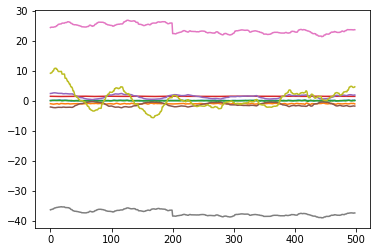

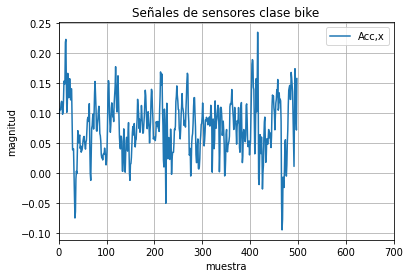

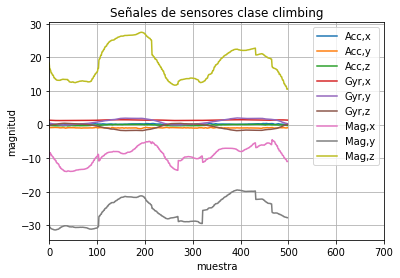

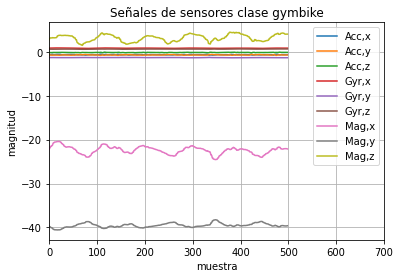

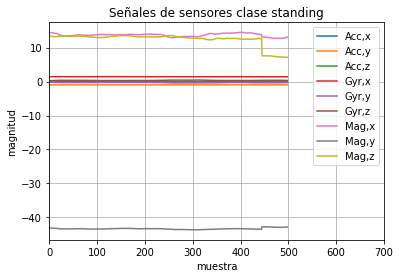

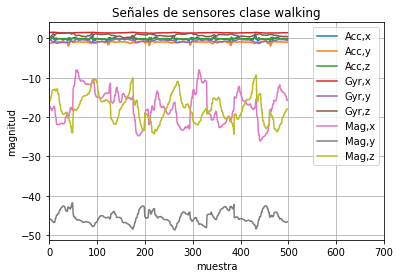

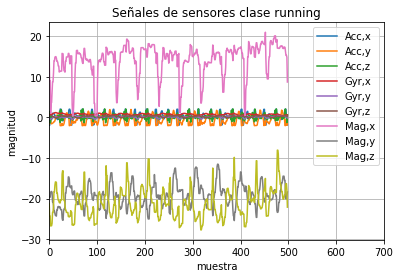

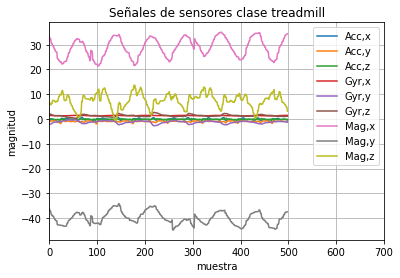

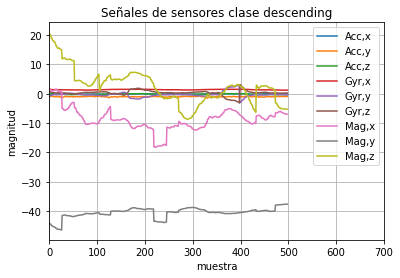

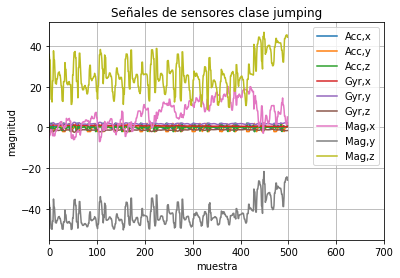

In [ ]:
#DESPLIEGUE DE CARACTERISTICAS
List_bike=Plot_Sensor_Signal(d_m_bike)#0
List_climbing=Plot_Sensor_Signal(d_m_climbing)#1
List_gymbike=Plot_Sensor_Signal(d_m_gymbike)#3
List_standing=Plot_Sensor_Signal(d_m_standing)#2
List_walking=Plot_Sensor_Signal(d_m_walking)#6
List_running=Plot_Sensor_Signal(d_m_running)#8
List_jumping=Plot_Sensor_Signal(d_m_jumping)#5
List_treadmill=Plot_Sensor_Signal(d_m_treadmill)#4
List_descending=Plot_Sensor_Signal(d_m_descending)#7

plt.figure(0)
#butter_lowpass_filter(Reduced_Data[:,0],2.0,30.0)
plt.plot(np.asarray(List_bike[1][:,0])[:-1],label='Acc,x')
plt.plot(np.asarray(List_bike[1][:,1])[:-1],label='Acc,y')
plt.plot(np.asarray(List_bike[1][:,2])[:-1],label='Acc,z')
plt.plot(np.asarray(List_bike[1][:,3])[:-1],label='Gyr,x')
plt.plot(np.asarray(List_bike[1][:,4])[:-1],label='Gyr,y')
plt.plot(np.asarray(List_bike[1][:,5])[:-1],label='Gyr,z')
plt.plot(np.asarray(List_bike[1][:,6])[:-1],label='Mag,x')
plt.plot(np.asarray(List_bike[1][:,7])[:-1],label='Mag,y')
plt.plot(np.asarray(List_bike[1][:,8])[:-1],label='Mag,z')
#plt.plot(butter_lowpass_filter(np.asarray(List_bike[1][:,0]),2.0,30.0)[:-1],label='bike Ac,x')
#plt.plot(butter_lowpass_filter(np.asarray(List_bike[1][:,1]),2.0,30.0)[:-1],label='bike Ac,x')
#plt.plot(butter_lowpass_filter(np.asarray(List_bike[1][:,2]),2.0,30.0)[:-1],label='bike Ac,x')
#plt.plot(butter_lowpass_filter(np.asarray(List_bike[1][:,3]),2.0,30.0)[:-1],label='bike Ac,x')
#plt.plot(butter_lowpass_filter(np.asarray(List_bike[1][:,4]),2.0,30.0)[:-1],label='bike Ac,x')
#plt.plot(butter_lowpass_filter(np.asarray(List_bike[1][:,5]),2.0,30.0)[:-1],label='bike Ac,x')
#plt.plot(butter_lowpass_filter(np.asarray(List_bike[1][:,6]),2.0,30.0)[:-1],label='bike Ac,x')
#plt.plot(butter_lowpass_filter(np.asarray(List_bike[1][:,7]),2.0,30.0)[:-1],label='bike Ac,x')
#plt.plot(butter_lowpass_filter(np.asarray(List_bike[1][:,8]),2.0,30.0)[:-1],label='bike Ac,x')

plt.figure(9)
plt.plot(np.asarray(List_bike[1][:,0])[:-1],label='Acc,x')
#plt.plot(butter_lowpass_filter(np.asarray(List_bike[1][:,0]),2.0,30.0)[:-1],label='bike Ac,x')

plt.title('Señales de sensores clase bike')
plt.grid(True)
plt.xlabel('muestra')
plt.ylabel('magnitud')
plt.legend(loc="best")
plt.xlim(0,700)
#plt.ylim(-12,12)

plt.figure(1)
#butter_lowpass_filter(Reduced_Data[:,0],2.0,30.0)
plt.plot(np.asarray(List_climbing[1][:,0])[:-1],label='Acc,x')
plt.plot(np.asarray(List_climbing[1][:,1])[:-1],label='Acc,y')
plt.plot(np.asarray(List_climbing[1][:,2])[:-1],label='Acc,z')
plt.plot(np.asarray(List_climbing[1][:,3])[:-1],label='Gyr,x')
plt.plot(np.asarray(List_climbing[1][:,4])[:-1],label='Gyr,y')
plt.plot(np.asarray(List_climbing[1][:,5])[:-1],label='Gyr,z')
plt.plot(np.asarray(List_climbing[1][:,6])[:-1],label='Mag,x')
plt.plot(np.asarray(List_climbing[1][:,7])[:-1],label='Mag,y')
plt.plot(np.asarray(List_climbing[1][:,8])[:-1],label='Mag,z')
#plt.plot(butter_lowpass_filter(np.asarray(List_descending[1][:,0]),2.0,30.0)[:-1],label='descending Ac,x')
plt.title('Señales de sensores clase climbing')
plt.grid(True)
plt.xlabel('muestra')
plt.ylabel('magnitud')
plt.legend(loc="best")
plt.xlim(0,700)
#plt.ylim(-20,20)

plt.figure(2)
#butter_lowpass_filter(Reduced_Data[:,0],2.0,30.0)
plt.plot(np.asarray(List_gymbike[1][:,0])[:-1],label='Acc,x')
plt.plot(np.asarray(List_gymbike[1][:,1])[:-1],label='Acc,y')
plt.plot(np.asarray(List_gymbike[1][:,2])[:-1],label='Acc,z')
plt.plot(np.asarray(List_gymbike[1][:,3])[:-1],label='Gyr,x')
plt.plot(np.asarray(List_gymbike[1][:,4])[:-1],label='Gyr,y')
plt.plot(np.asarray(List_gymbike[1][:,5])[:-1],label='Gyr,z')
plt.plot(np.asarray(List_gymbike[1][:,6])[:-1],label='Mag,x')
plt.plot(np.asarray(List_gymbike[1][:,7])[:-1],label='Mag,y')
plt.plot(np.asarray(List_gymbike[1][:,8])[:-1],label='Mag,z')
#plt.plot(butter_lowpass_filter(np.asarray(List_descending[1][:,0]),2.0,30.0)[:-1],label='descending Ac,x')
plt.title('Señales de sensores clase gymbike')
plt.grid(True)
plt.xlabel('muestra')
plt.ylabel('magnitud')
plt.legend(loc="best")
plt.xlim(0,700)
#plt.ylim(-40,40)

plt.figure(4)
#butter_lowpass_filter(Reduced_Data[:,0],2.0,30.0)
plt.plot(np.asarray(List_standing[1][:,0])[:-1],label='Acc,x')
plt.plot(np.asarray(List_standing[1][:,1])[:-1],label='Acc,y')
plt.plot(np.asarray(List_standing[1][:,2])[:-1],label='Acc,z')
plt.plot(np.asarray(List_standing[1][:,3])[:-1],label='Gyr,x')
plt.plot(np.asarray(List_standing[1][:,4])[:-1],label='Gyr,y')
plt.plot(np.asarray(List_standing[1][:,5])[:-1],label='Gyr,z')
plt.plot(np.asarray(List_standing[1][:,6])[:-1],label='Mag,x')
plt.plot(np.asarray(List_standing[1][:,7])[:-1],label='Mag,y')
plt.plot(np.asarray(List_standing[1][:,8])[:-1],label='Mag,z')
#plt.plot(butter_lowpass_filter(np.asarray(List_descending[1][:,0]),2.0,30.0)[:-1],label='descending Ac,x')
plt.title('Señales de sensores clase standing')
plt.grid(True)
plt.xlabel('muestra')
plt.ylabel('magnitud')
plt.legend(loc="best")
plt.xlim(0,700)
#plt.ylim(-10,10)
#

plt.figure(5)
#butter_lowpass_filter(Reduced_Data[:,0],2.0,30.0)
plt.plot(np.asarray(List_walking[1][:,0])[:-1],label='Acc,x')
plt.plot(np.asarray(List_walking[1][:,1])[:-1],label='Acc,y')
plt.plot(np.asarray(List_walking[1][:,2])[:-1],label='Acc,z')
plt.plot(np.asarray(List_walking[1][:,3])[:-1],label='Gyr,x')
plt.plot(np.asarray(List_walking[1][:,4])[:-1],label='Gyr,y')
plt.plot(np.asarray(List_walking[1][:,5])[:-1],label='Gyr,z')
plt.plot(np.asarray(List_walking[1][:,6])[:-1],label='Mag,x')
plt.plot(np.asarray(List_walking[1][:,7])[:-1],label='Mag,y')
plt.plot(np.asarray(List_walking[1][:,8])[:-1],label='Mag,z')
#plt.plot(butter_lowpass_filter(np.asarray(List_descending[1][:,0]),2.0,30.0)[:-1],label='descending Ac,x')
plt.title('Señales de sensores clase walking')
plt.grid(True)
plt.xlabel('muestra')
plt.ylabel('magnitud')
plt.legend(loc="best")
plt.xlim(0,700)
#plt.figure(1)


plt.figure(6)
#butter_lowpass_filter(Reduced_Data[:,0],2.0,30.0)
plt.plot(np.asarray(List_running[1][:,0])[:-1],label='Acc,x')
plt.plot(np.asarray(List_running[1][:,1])[:-1],label='Acc,y')
plt.plot(np.asarray(List_running[1][:,2])[:-1],label='Acc,z')
plt.plot(np.asarray(List_running[1][:,3])[:-1],label='Gyr,x')
plt.plot(np.asarray(List_running[1][:,4])[:-1],label='Gyr,y')
plt.plot(np.asarray(List_running[1][:,5])[:-1],label='Gyr,z')
plt.plot(np.asarray(List_running[1][:,6])[:-1],label='Mag,x')
plt.plot(np.asarray(List_running[1][:,7])[:-1],label='Mag,y')
plt.plot(np.asarray(List_running[1][:,8])[:-1],label='Mag,z')
#plt.plot(butter_lowpass_filter(np.asarray(List_descending[1][:,0]),2.0,30.0)[:-1],label='descending Ac,x')
plt.title('Señales de sensores clase running')
plt.grid(True)
plt.xlabel('muestra')
plt.ylabel('magnitud')
plt.legend(loc="best")
plt.xlim(0,700)

plt.figure(7)
#butter_lowpass_filter(Reduced_Data[:,0],2.0,30.0)
plt.plot(np.asarray(List_treadmill[1][:,0])[:-1],label='Acc,x')
plt.plot(np.asarray(List_treadmill[1][:,1])[:-1],label='Acc,y')
plt.plot(np.asarray(List_treadmill[1][:,2])[:-1],label='Acc,z')
plt.plot(np.asarray(List_treadmill[1][:,3])[:-1],label='Gyr,x')
plt.plot(np.asarray(List_treadmill[1][:,4])[:-1],label='Gyr,y')
plt.plot(np.asarray(List_treadmill[1][:,5])[:-1],label='Gyr,z')
plt.plot(np.asarray(List_treadmill[1][:,6])[:-1],label='Mag,x')
plt.plot(np.asarray(List_treadmill[1][:,7])[:-1],label='Mag,y')
plt.plot(np.asarray(List_treadmill[1][:,8])[:-1],label='Mag,z')
#plt.plot(butter_lowpass_filter(np.asarray(List_descending[1][:,0]),2.0,30.0)[:-1],label='descending Ac,x')
plt.title('Señales de sensores clase treadmill')
plt.grid(True)
plt.xlabel('muestra')
plt.ylabel('magnitud')
plt.legend(loc="best")
plt.xlim(0,700)

plt.figure(8)
#butter_lowpass_filter(Reduced_Data[:,0],2.0,30.0)
plt.plot(np.asarray(List_descending[1][:,0])[:-1],label='Acc,x')
plt.plot(np.asarray(List_descending[1][:,1])[:-1],label='Acc,y')
plt.plot(np.asarray(List_descending[1][:,2])[:-1],label='Acc,z')
plt.plot(np.asarray(List_descending[1][:,3])[:-1],label='Gyr,x')
plt.plot(np.asarray(List_descending[1][:,4])[:-1],label='Gyr,y')
plt.plot(np.asarray(List_descending[1][:,5])[:-1],label='Gyr,z')
plt.plot(np.asarray(List_descending[1][:,6])[:-1],label='Mag,x')
plt.plot(np.asarray(List_descending[1][:,7])[:-1],label='Mag,y')
plt.plot(np.asarray(List_descending[1][:,8])[:-1],label='Mag,z')
#plt.plot(butter_lowpass_filter(np.asarray(List_descending[1][:,0]),2.0,30.0)[:-1],label='descending Ac,x')
plt.title('Señales de sensores clase descending')
plt.grid(True)
plt.xlabel('muestra')
plt.ylabel('magnitud')
plt.legend(loc="best")
plt.xlim(0,700)


plt.figure(3)
#butter_lowpass_filter(Reduced_Data[:,0],2.0,30.0)
plt.plot(np.asarray(List_jumping[1][:,0])[:-1],label='Acc,x')
plt.plot(np.asarray(List_jumping[1][:,1])[:-1],label='Acc,y')
plt.plot(np.asarray(List_jumping[1][:,2])[:-1],label='Acc,z')
plt.plot(np.asarray(List_jumping[1][:,3])[:-1],label='Gyr,x')
plt.plot(np.asarray(List_jumping[1][:,4])[:-1],label='Gyr,y')
plt.plot(np.asarray(List_jumping[1][:,5])[:-1],label='Gyr,z')
plt.plot(np.asarray(List_jumping[1][:,6])[:-1],label='Mag,x')
plt.plot(np.asarray(List_jumping[1][:,7])[:-1],label='Mag,y')
plt.plot(np.asarray(List_jumping[1][:,8])[:-1],label='Mag,z')
#plt.plot(butter_lowpass_filter(np.asarray(List_descending[1][:,0]),2.0,30.0)[:-1],label='descending Ac,x')
plt.title('Señales de sensores clase jumping')
plt.grid(True)
plt.xlabel('muestra')
plt.ylabel('magnitud')
plt.legend(loc="best")
plt.xlim(0,700)

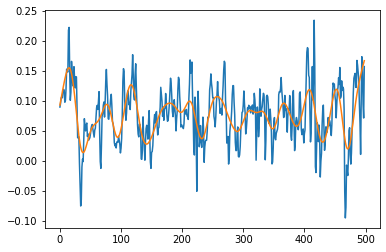

In [ ]:
plt.figure(9)
plt.plot(np.asarray(List_bike[1][:,0])[:-1],label='Acc,x')
plt.plot(butter_lowpass_filter(np.asarray(List_bike[1][:,0]),2.0,30.0)[:-1],label='bike Ac,x')

In [ ]:
##PROCESAMIENTO DE LAS SEÑALES DE CADA CLASE
#PARA LA GENERACION DE UN MODEL, PARA LA FUNCION DE EXTRACCION DE CARACTERISTICAS, PARA CADA MODELO DEBE DE SER EL MISMO STEP Y VENTANA
times_windows=250
steps=250
# 
#PROCESAR CONJUNOT DE ENTRENAMIENTO
t_pres_training_Val=time.time()
X_bikes = pres_pros(d_m_bike,0, time_window=times_windows,step=steps,butter=True)            #0
X_climbings = pres_pros(d_m_climbing,1,time_window=times_windows,step=steps,butter=True)     #1
X_gymbikes = pres_pros(d_m_gymbike,2,time_window=times_windows,step=steps,butter=True)      #0
X_descendings = pres_pros(d_m_descending,3,time_window=times_windows,step=steps,butter=True) #3
X_standings = pres_pros(d_m_standing,4,time_window=times_windows,step=steps,butter=True)   #4
X_walkings = pres_pros(d_m_walking,5,time_window=times_windows,step=steps,butter=True)       #5
X_runnings = pres_pros(d_m_running,6,time_window=times_windows,step=steps,butter=True)       #6
X_jumpings = pres_pros(d_m_jumping,7,time_window=times_windows,step=steps,butter=True)       #7
X_treadmills = pres_pros(d_m_treadmill,8,time_window=times_windows,step=steps,butter=True)   #8
print('Tiempo preprocesamiento entrenamiento con ventana de '+str(times_windows)+' datos'+' y paso de '+str(steps)+': ' +str(time()-t_pres_training_Val)+' seg')
#PROCESAR CONJUNTO DE PRUEBA
X_bikesss_Test = pres_pros(d_m_bike_Test,0,time_window=times_windows,step=steps,butter=True)              #0
X_climbingsss_Test = pres_pros(d_m_climbing_Test,1,time_window=times_windows,step=steps,butter=True)      #1
X_gymbikesss_Test = pres_pros(d_m_gymbike_Test,2,time_window=times_windows,step=steps,butter=True)        #0
X_descendingsss_Test = pres_pros(d_m_descending_Test,3,time_window=times_windows,step=steps,butter=True)  #3
X_standingsss_Test = pres_pros(d_m_standing_Test,4,time_window=times_windows,step=steps,butter=True)    #4
X_walkingsss_Test = pres_pros(d_m_walking_Test,5,time_window=times_windows,step=steps,butter=True)#5
X_runningsss_Test = pres_pros(d_m_running_Test,6,time_window=times_windows,step=steps,butter=True)       #6
X_jumpingsss_Test = pres_pros(d_m_jumping_Test,7,time_window=times_windows,step=steps,butter=True)        #7
X_treadmillsss_Test = pres_pros(d_m_treadmill_Test,8,time_window=times_windows,step=steps,butter=True)   #8
print('Tiempo preprocesamiento prueba con ventana de '+str(times_windows)+' datos'+' y paso de '+str(steps)+': ' +str(time()-t_pres_training_Val)+' seg')
# TRAINING
# INCLUYE BLANCE DE PROPORCION DE DATOS DE CADA CLASE EN CONJUNTO DE ENTRENAMIENTO(AGREGAR INFORMACION)
X0=np.asarray(X_bikes)##
X1=np.asarray(X_climbings)
X2=np.asarray(X_gymbikes)##
X3=np.asarray(X_descendings)
X4=np.asarray(X_standings)
X5=np.asarray(X_walkings)
X6=np.asarray(X_runnings)#
X7=np.asarray(X_jumpings)
X8=np.asarray(X_treadmills)#
##NUMERO MIN DE OBSERVACIONES 
# numero_min_obs=np.amin([X0.shape[0],X1.shape[0],X2.shape[0],X3.shape[0],
#             X4.shape[0],X5.shape[0],X6.shape[0],X7.shape[0],X8.shape[0]])
# X0=X0[:numero_min_obs,:]
# X1=X1[:numero_min_obs,:]
# X2=X2[:numero_min_obs,:]
# X3=X3[:numero_min_obs,:]
# X4=X4[:numero_min_obs,:]
# X5=X5[:numero_min_obs,:]
# X6=X6[:numero_min_obs,:]
# X7=X7[:numero_min_obs,:]
# X8=X8[:numero_min_obs,:] 
X=np.concatenate((X0,X1,X2,X3,X4,X5,X6,X7,X8),axis=0)
#PERMUTACION AL AZAR DE LAS FILAS(observaciones por clase)
#X=np.random.permutation(X)
np.random.shuffle(X) 
X_f=X[:,0:X.shape[1]-1]#
yy=X[:,X.shape[1]-1]
#TEST
X0_Test=np.asarray(X_bikesss_Test)
X1_Test=np.asarray(X_climbingsss_Test)
X2_Test=np.asarray(X_gymbikesss_Test)
X3_Test=np.asarray(X_descendingsss_Test)
X4_Test=np.asarray(X_standingsss_Test)
X5_Test=np.asarray(X_walkingsss_Test)
X6_Test=np.asarray(X_runningsss_Test)
X7_Test=np.asarray(X_jumpingsss_Test)
X8_Test=np.asarray(X_treadmillsss_Test)
X_Test=np.concatenate((X0_Test,X1_Test,X2_Test,X3_Test,X4_Test,X5_Test,X6_Test,X7_Test,X8_Test),axis=0)
#
#PERMUTACION AL AZAR DE LAS FILAS(observaciones por clase)
#X_Test=np.random.permutation(X_Test)
np.random.shuffle(X_Test) 
X_f_Test=X_Test[:,0:X_Test.shape[1]-1]#
y_Test=X_Test[:,X_Test.shape[1]-1]
#
X = X_f
#X_Test=scaler.fit_transform(X_f_Test) 
X_Test = X_f_Test
##VECTIR CON CLASE OBSERVADAS
y_True=yy
y_True_Test=y_Test
#y

Tiempo preprocesamiento entrenamiento con ventana de 250 datos y paso de 250: 7.381721496582031 seg
Tiempo preprocesamiento prueba con ventana de 250 datos y paso de 250: 9.492661952972412 seg


In [ ]:
X_f.shape

(586, 78)

In [ ]:
# SELECTOR DE CARACTERISTICAS 1
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
KBest =  SelectKBest(chi2, k =65)
KBest=KBest.fit(np.abs(X), y_True)
features_Selected=KBest.get_support(indices=True)
features_Selected=np.array(features_Selected)
#indx_feat=np.asarray(np.where(features_Selected == True))
#X=np.zeros((y_True_Test.shape[0],indx_feat.shape[1]))
X_x=np.zeros((X.shape[0],features_Selected.shape[0]))
X_test=np.zeros((X_Test.shape[0],features_Selected.shape[0]))
# 
for r in range(0,features_Selected.shape[0]):
    X_test[:,r]=X_Test[:,features_Selected[r]]
    X_x[:,r]=X[:,features_Selected[r]]
# X_x=X
# X_test=X_Test


In [ ]:
X_x.shape

(586, 65)

In [ ]:
#CARACTERISTICAS
X_Test=X_test
X=X_x
##VECTOR CON CLASE OBSERVADAS
y_True1=y_True.astype(int)     #COMO ENTEROS LAS CLASES DE ENTRENAMIENTO/VALIDACION
y_True_Test1=y_Test.astype(int)#COMO ENTEROS CLASES DE PRUEBA

In [ ]:
(np.unique(y_True1))

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
#LABEL BINARIZER EN SALIDA(VECTOR CON CLASES) PARA EL CONJUNTO DE ENTRENAMIENTO Y VALIDACION
from sklearn.preprocessing import LabelBinarizer
#ONE HOT ENCODING ENTRENAMIENTO Y VALIDACION
label_binarizer = LabelBinarizer()
label_binarizer.fit(range(max(y_True1)+1))
y_True = label_binarizer.transform(y_True1).astype(float)
# y_True = y_True1.astype(float)
y_True_Test = label_binarizer.transform(y_True_Test1).astype(float)
# y_True_Test = y_True_Test1.astype(float)

In [ ]:
y_True

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
#NUMERO DE MUESTRAS Y NUMERO DE CARACTERISTICAS DEL SET DE DATOS SIN CLASEW
n_samples, n_features = X.shape
N=n_samples
#NUMERO DE CLASES
n_class= y_True.shape[1]
# n_class= len(np.unique(y_True))

In [ ]:
#DIVISIÓN DE BASE DE DATOS EN ENTRENAMIENTO/VALIDACION/PRUEBA
#PORCENTAJE PARA LA CLASIFICACION EN CONJUNTO DE ENTRENAMIENTO (60%), PRUEBA(20%) Y VALIDACION(20%)
prct_1 = 0.8
#GENERACION DE EL CONJUNTO DE ENTRENAMIENTO Y PRUEBA DE LOS DATOS PERMUTADOS AL AZAR
X_Training = X[0:round(N*prct_1),:]#80% DE DATOS PERMUTADOS AL AZAR
y_True_Training = y_True[0:round(N*prct_1)]
y_True_Val = y_True[round(N*prct_1):]

scaler = StandardScaler().fit(X_Training)
X_Training= scaler.transform(X_Training)
X_Val = scaler.transform(X[round(N*prct_1):,:])#20% DE DATOS PARA PRUEBA
X_Test= scaler.transform(X_Test)

In [ ]:
X_Training.shape

(469, 65)

In [ ]:
y_True_Training.shape

(469, 9)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Epoch: 0001 cost= 11.142151969
0-Accuracy validation: 0.05982906

Epoch: 0101 cost= 0.473411555
100-Accuracy validation: 0.85470086

Epoch: 0201 cost= 0.181390036
200-Accuracy validation: 0.93162394

Epoch: 0301 cost= 0.126029830
300-Accuracy validation: 0.95726496

Epoch: 0401 cost= 0.048168503
400-Accuracy validation: 0.96581197

Epoch: 0501 cost= 0.027865837
500-Accuracy validation: 0.974359

Epoch: 0601 cost= 0.029815257
600-Accuracy validation: 0.974359

Epoch: 0701 cost= 0.018271988
700-Accuracy validation: 0.974359

Optimization Finished!
Tiempo de entrenaniento total15.0seg
Accuracy validation: 0.974359
Confusion matrix validation
[[ 9  0  0  0  0  0  0  0  0]
 [ 1 13  2  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0]
 [ 0  0  0  0  0 13  0  0  0]
 [ 0  0  0  0  0  0 14  0  0]
 [ 0  0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0 14]]


<ipython-input-36-2ae8b76cd3a7>:101: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


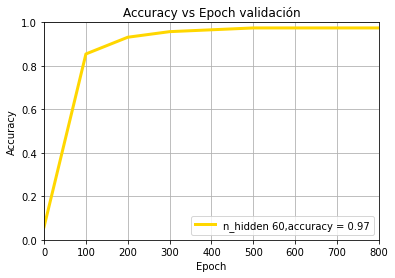

In [ ]:
#FUNCION DE PRESRPTRON MULTICAPA CON UNA CAPA OCULTA
def multilayer_perceptron(x, weights, biases, keep_prob):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])   # FORMA CAPA OCULTA "(w_k^T)*x+bias_k)" x entrada( No beuronas capa de entrada=)
    layer_1 = tf.nn.sigmoid(layer_1)                              #FUNCION DE ACTIVACION SIGMOIDAL Sigmoidal_k((w_k^T)*x+bias_k)
    layer_1 = tf.nn.dropout(layer_1, keep_prob)                   #randomly sets elements to zero to prevent overfitting/centrar en cero con probabilidad
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']#funcion de activacion para la capa de salida con No de neuronas de la salida igual al numero de clases
    return out_layer
#
n_hidden_1 = 60         #NUMERO DE NEURONAS CAPA OCULTA
n_input = X.shape[1]         #numero caracteristicas de entradas
# n_classes = y_True.shape[1]  #numero de clases
n_classes =n_class

#weights = {'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))}#h1: n_input x n_hidden_1  y out: n_hidden_1 x n_clases
#biases = {'b1': tf.Variable(tf.random_normal([n_hidden_1])),'out': tf.Variable(tf.random_normal([n_classes]))}#n_hidden_1 biases capa oculta; n_classes biases capa de salida
weights = {'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1])),'out': tf.Variable(tf.random.normal([n_hidden_1, n_classes]))}#h1: n_input x n_hidden_1  y out: n_hidden_1 x n_clases
biases = {'b1': tf.Variable(tf.random.normal([n_hidden_1])),'out': tf.Variable(tf.random.normal([n_classes]))}#n_hidden_1 biases capa oculta; n_classes biases capa de salida
#keep_prob = tf.compat.v1.placeholder("float")#value is used to control the dropout rate
keep_prob = tf.placeholder("float")#value is used to control the dropout rate

#place holder variable that we will assign data to at a later date
training_epochs = 800 #numero de iteracions sobre el conjunto de entrenamientio
display_step = 100    # display para despliegue del valor de accuaricy y el costo respetivo generado
batch_size = 32       #tamaño del batch
# 
x = tf.placeholder("float", [None, n_input])  #variable de entrada
y = tf.placeholder("float", [None, n_classes])#variable de salida

predictions = multilayer_perceptron(x, weights, biases, keep_prob)#DEFINIMOS LA FUNCION PARA LAS PREDICCIONES CON EL MODELO
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))#SE DEFINE LA FUNCION DE COSTE

optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
#IMPORTAR MODELO TIME PARA MEDIR EL TIEMPO
from time import time
#INICIALIZACION DE LISTAS
valid_accuracy_results = [] #ACCURACY EN EL CONJUNTO DE VALIDACION
test_accuracy_results=[] #ACCURACY EN EL CONJUNTO DE PRUEBA
Avg_cost=np.zeros((training_epochs)) #guardar el costo para el conjuto de entrenamiento
EPOCHES=[]#GUARDAR EPOCAS DEL display_step     
Cxf=[]                                                                
# Launch the graph
#interaccion con red en tensorgfloiw
with tf.Session() as sess:
   # setup the variable initialisation
    sess.run(tf.global_variables_initializer())#INICIALIZAVCION DE LAS VARIABLES, 
    # Training cycle por 
    t0 = time()#TIEMPO DE ENTRENAMIENTO
    for epoch in range(training_epochs):
        #
        avg_cost = 0.0#COSTO INICIAL DE EPOCA
        total_batch = int(len(X_Training) / batch_size)#NUMERO DE BATCHES EN EL CONJUNTO DE ENTRENAMIENTO
        #
        x_batches = np.array_split(X_Training, total_batch)#GENERAR total_batch CONJUNTOS SPLIT DEL CONJUTNO  DE ENTRENAMIENTO
        y_batches = np.array_split(y_True_Training, total_batch)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = x_batches[i], y_batches[i]#TOMAR EL I-ESIMA BATCH DE ENTRENAMIENTO DE ENTRADA Y SALIDA
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost],feed_dict={x: batch_x, y: batch_y, keep_prob: 0.8})
            # Compute average loss
            avg_cost += c / total_batch
        Avg_cost[epoch] = avg_cost 
         
        #T_end=(time.time() - t0)                                                  #tiempo de entrenamiento para un batch 
        if epoch % display_step == 0:                                              #PERIDODO DE MUESTREO DEL COSTE ENTYRENADO
            EPOCHES.append(epoch)#SE GUARDAN LA EPOCAS PARA LA CUAL SE DESPLIEGA SYU COSTE
            print("Epoch:", '%04d' % (epoch+1), "cost=","{:.9f}" .format(avg_cost))#DESPLIEGUE DE LA EPOCA Y EL COSTE OBTENIDO
            correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))#DEFINE CORRECT PREDICTION 
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))        #DEFINE ACCURACY
            r=accuracy.eval({x: X_Val, y: y_True_Val, keep_prob: 1.0})              #evaluacion del accuracy en el conjunto de validacion pen determinada epoca
            valid_accuracy_results.append(r)                                       #seguarda el calor y la epoca
            print(str(epoch)+'-'+'Accuracy validation:', r)
            #print('step cost:'+str(T_end)+'seg')
            #print('step cost:'+str(ty)+'seg0')
            print('')
    print("Optimization Finished!")
    T_end=(time() - t0)  
    print('Tiempo de entrenaniento total'+str(np.round(T_end))+'seg')
    #model validacion
    correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))#definicion simbolica de la correccion correcta
    #
    accuracys = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    valid_accuracy_results.append(accuracys.eval({x: X_Val, y: y_True_Val, keep_prob: 1.0}))
    valid_accuracy_result=np.array(valid_accuracy_results)
    #
    test_accuracy=tf.reduce_mean(tf.cast(correct_prediction, "float"))
    test_accuracy_results.append(test_accuracy.eval({x: X_Test, y: y_True_Test, keep_prob: 1.0}))
    test_accuracy_result=np.array(test_accuracy_results)
    #
    EPOCHES.append(800)
    EPOCHES=np.array(EPOCHES)
    print('Accuracy validation:', accuracys.eval({x:  X_Val, y: y_True_Val, keep_prob: 1.0}))
    print('Confusion matrix validation')
    confm = tf.confusion_matrix(tf.argmax(y,1),tf.argmax(predictions, 1), num_classes = y_True_Val.shape[1])
    C=confm.eval({x: X_Val, y: y_True_Val, keep_prob: 1.0})
    # C=np.round(C / C.astype(np.float).sum(axis=1),decimals=2)    
    #C=pd.DataFrame(C,index=None,columns=None)
    #MATRIZ DE CONFUSION PARA EL CONJUNTO DE PRUEBA
    confm_test = tf.confusion_matrix(tf.argmax(y,1),tf.argmax(predictions, 1), num_classes =y_True_Test.shape[1])
    C_test=confm_test.eval({x: X_Test, y: y_True_Test, keep_prob: 1.0})
    C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2) 
    Cxf.append(C_test) 
    print(C)
    plt.figure()
    plt.plot(EPOCHES,valid_accuracy_result, color='gold',linewidth=3, linestyle='-',label='n_hidden 60,accuracy = %0.2f' % valid_accuracy_result[8])
    plt.title('Accuracy vs Epoch validación')
    plt.grid(True)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc="lower right")
    plt.xlim(0,800)
    plt.ylim(0,1)

In [ ]:
# confm_test = tf.confusion_matrix(tf.argmax(y,1),tf.argmax(predictions, 1), num_classes = y_True_Test.shape[1])
# print( confm_test.eval({x: X_Test, y: y_True_Test, keep_prob: 1.0}) )
print(C_test)
print(test_accuracy_result)

[[0.1  0.05 0.1  0.   0.   0.   0.1  0.25 0.4 ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.45 0.   0.05 0.5  0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.9  0.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.05 0.95 0.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.   0.7  0.   0.05]
 [0.   0.15 0.1  0.   0.   0.15 0.   0.6  0.  ]
 [0.05 0.2  0.05 0.   0.   0.1  0.   0.15 0.45]]
[0.6888889]


In [ ]:
valid_accuracy_result

array([0.05982906, 0.85470086, 0.93162394, 0.95726496, 0.96581197,
       0.974359  , 0.974359  , 0.974359  , 0.974359  ], dtype=float32)

RANDOM_STATE = 0

Numero Neuronas capa oculta = 10
Epoch: 0001 cost= 3.770346335
0-Accuracy validation: 0.051282052
Epoch: 0101 cost= 1.110965056
100-Accuracy validation: 0.72649574
Epoch: 0201 cost= 0.663493122
200-Accuracy validation: 0.84615386
Epoch: 0301 cost= 0.508229034
300-Accuracy validation: 0.8803419
Epoch: 0401 cost= 0.414107094
400-Accuracy validation: 0.94017094
Epoch: 0501 cost= 0.314956054
500-Accuracy validation: 0.9230769
Epoch: 0601 cost= 0.282812405
600-Accuracy validation: 0.93162394
Epoch: 0701 cost= 0.245960834
700-Accuracy validation: 0.94017094
Optimization Finished!
El Tiempo de entrenaniento total para 10 neuronas en la capa oculta es 11.9 [seg]
Accuracy validation: 0.94017094
Confusion matrix validation
[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.88 0.08 0.   0.   0.08 0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.11 0.   0.   0.91 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.95 0.08 0.   0.   0.  ]
 [0.   0.   0.   0.

<ipython-input-39-9f319adda206>:113: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C/C.astype(np.float).sum(axis=1),decimals=2)
<ipython-input-39-9f319adda206>:119: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)



Numero Neuronas capa oculta = 28
Epoch: 0001 cost= 5.924725022
0-Accuracy validation: 0.18803419
Epoch: 0101 cost= 0.651192942
100-Accuracy validation: 0.9059829
Epoch: 0201 cost= 0.357150144
200-Accuracy validation: 0.9230769
Epoch: 0301 cost= 0.222693079
300-Accuracy validation: 0.93162394
Epoch: 0401 cost= 0.134746937
400-Accuracy validation: 0.95726496
Epoch: 0501 cost= 0.095289490
500-Accuracy validation: 0.95726496
Epoch: 0601 cost= 0.062103222
600-Accuracy validation: 0.96581197
Epoch: 0701 cost= 0.043243750
700-Accuracy validation: 0.974359
Optimization Finished!
El Tiempo de entrenaniento total para 28 neuronas en la capa oculta es 13.11 [seg]
Accuracy validation: 0.974359
Confusion matrix validation


<ipython-input-39-9f319adda206>:113: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C/C.astype(np.float).sum(axis=1),decimals=2)
<ipython-input-39-9f319adda206>:119: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.11 0.81 0.15 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]

Numero Neuronas capa oculta = 180
Epoch: 0001 cost= 12.587839876
0-Accuracy validation: 0.17948718
Epoch: 0101 cost= 0.254653178
100-Accuracy validation: 0.974359
Epoch: 0201 cost= 0.078658200
200-Accuracy validation: 0.974359
Epoch: 0301 cost= 0.042865058
300-Accuracy validation: 0.974359
Epoch: 0401 cost= 0.020992715
400-Accuracy validation: 0.974359
Epoch: 0501 cost= 0.002245226
500-Accuracy validation: 0.974359
Epoch: 0601 cost= 0.015252890
600-Accuracy validation: 0.974359
Epoch: 0701 cost= 0.003475423
700-Accuracy validation: 0.974359
Optimization Finish

<ipython-input-39-9f319adda206>:113: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C/C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.11 0.88 0.08 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.08 0.   0.   0.93]]


<ipython-input-39-9f319adda206>:119: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


RANDOM_STATE = 42

Numero Neuronas capa oculta = 10
Epoch: 0001 cost= 4.351574438
0-Accuracy validation: 0.18803419
Epoch: 0101 cost= 1.241509885
100-Accuracy validation: 0.7777778
Epoch: 0201 cost= 0.753484287
200-Accuracy validation: 0.8717949
Epoch: 0301 cost= 0.586973612
300-Accuracy validation: 0.8717949
Epoch: 0401 cost= 0.447331098
400-Accuracy validation: 0.9059829
Epoch: 0501 cost= 0.406396985
500-Accuracy validation: 0.9059829
Epoch: 0601 cost= 0.314791825
600-Accuracy validation: 0.9145299
Epoch: 0701 cost= 0.321423098
700-Accuracy validation: 0.9145299
Optimization Finished!
El Tiempo de entrenaniento total para 10 neuronas en la capa oculta es 13.1 [seg]
Accuracy validation: 0.9145299
Confusion matrix validation


<ipython-input-39-9f319adda206>:113: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C/C.astype(np.float).sum(axis=1),decimals=2)
<ipython-input-39-9f319adda206>:119: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


[[0.89 0.06 0.   0.   0.   0.   0.   0.   0.  ]
 [0.11 0.81 0.08 0.   0.   0.   0.   0.   0.07]
 [0.   0.06 0.92 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.06 0.   0.   0.16 0.69 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.08 0.   0.   0.   0.   0.   0.93]]

Numero Neuronas capa oculta = 28
Epoch: 0001 cost= 5.562126194
0-Accuracy validation: 0.11111111
Epoch: 0101 cost= 0.669511714
100-Accuracy validation: 0.8717949
Epoch: 0201 cost= 0.305418931
200-Accuracy validation: 0.9230769
Epoch: 0301 cost= 0.152780226
300-Accuracy validation: 0.93162394
Epoch: 0401 cost= 0.110883854
400-Accuracy validation: 0.96581197
Epoch: 0501 cost= 0.075643704
500-Accuracy validation: 0.96581197
Epoch: 0601 cost= 0.034550022
600-Accuracy validation: 0.96581197
Epoch: 0701 cost= 0.050483797
700-Accuracy validation: 0.95726496
Optimizat

<ipython-input-39-9f319adda206>:113: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C/C.astype(np.float).sum(axis=1),decimals=2)
<ipython-input-39-9f319adda206>:119: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.11 0.81 0.08 0.   0.   0.08 0.   0.   0.  ]
 [0.   0.06 0.92 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.08 0.   0.   0.93]]

Numero Neuronas capa oculta = 180
Epoch: 0001 cost= 21.004454476
0-Accuracy validation: 0.11965812
Epoch: 0101 cost= 0.340424496
100-Accuracy validation: 0.94871795
Epoch: 0201 cost= 0.080327258
200-Accuracy validation: 0.96581197
Epoch: 0301 cost= 0.020532645
300-Accuracy validation: 0.96581197
Epoch: 0401 cost= 0.009906620
400-Accuracy validation: 0.974359
Epoch: 0501 cost= 0.024513989
500-Accuracy validation: 0.974359
Epoch: 0601 cost= 0.002305185
600-Accuracy validation: 0.96581197
Epoch: 0701 cost= 0.000402613
700-Accuracy validation: 0.96581197
Optimizat

<ipython-input-39-9f319adda206>:113: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C/C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.88 0.08 0.   0.   0.   0.07 0.   0.  ]
 [0.   0.06 0.92 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.08 0.   0.   0.93]]


<ipython-input-39-9f319adda206>:119: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


RANDOM_STATE = 100

Numero Neuronas capa oculta = 10
Epoch: 0001 cost= 4.717038955
0-Accuracy validation: 0.05982906
Epoch: 0101 cost= 1.053176731
100-Accuracy validation: 0.6752137
Epoch: 0201 cost= 0.668910457
200-Accuracy validation: 0.82051283
Epoch: 0301 cost= 0.590915401
300-Accuracy validation: 0.8803419
Epoch: 0401 cost= 0.428367838
400-Accuracy validation: 0.94871795
Epoch: 0501 cost= 0.377915510
500-Accuracy validation: 0.94871795
Epoch: 0601 cost= 0.335779596
600-Accuracy validation: 0.94017094
Epoch: 0701 cost= 0.337978937
700-Accuracy validation: 0.94871795
Optimization Finished!
El Tiempo de entrenaniento total para 10 neuronas en la capa oculta es 15.28 [seg]
Accuracy validation: 0.94871795
Confusion matrix validation


<ipython-input-39-9f319adda206>:113: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C/C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.81 0.08 0.   0.   0.   0.07 0.   0.07]
 [0.   0.06 0.92 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.93 0.   0.07]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.08 0.   0.   0.93]]


<ipython-input-39-9f319adda206>:119: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)



Numero Neuronas capa oculta = 28
Epoch: 0001 cost= 6.420945168
0-Accuracy validation: 0.102564104
Epoch: 0101 cost= 0.798682979
100-Accuracy validation: 0.7777778
Epoch: 0201 cost= 0.362108272
200-Accuracy validation: 0.8888889
Epoch: 0301 cost= 0.222208546
300-Accuracy validation: 0.9059829
Epoch: 0401 cost= 0.121787518
400-Accuracy validation: 0.94017094
Epoch: 0501 cost= 0.075959727
500-Accuracy validation: 0.94871795
Epoch: 0601 cost= 0.052530470
600-Accuracy validation: 0.95726496
Epoch: 0701 cost= 0.043441467
700-Accuracy validation: 0.95726496
Optimization Finished!
El Tiempo de entrenaniento total para 28 neuronas en la capa oculta es 13.45 [seg]
Accuracy validation: 0.95726496
Confusion matrix validation


<ipython-input-39-9f319adda206>:113: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C/C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.11 0.88 0.08 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.92 0.   0.   0.   0.   0.   0.07]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.95 0.08 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.08 0.   0.   0.   0.   0.   0.93]]


<ipython-input-39-9f319adda206>:119: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)



Numero Neuronas capa oculta = 180
Epoch: 0001 cost= 14.597292696
0-Accuracy validation: 0.102564104
Epoch: 0101 cost= 0.283730939
100-Accuracy validation: 0.94017094
Epoch: 0201 cost= 0.073902990
200-Accuracy validation: 0.96581197
Epoch: 0301 cost= 0.034029805
300-Accuracy validation: 0.974359
Epoch: 0401 cost= 0.031091083
400-Accuracy validation: 0.974359
Epoch: 0501 cost= 0.002520107
500-Accuracy validation: 0.974359
Epoch: 0601 cost= 0.003540917
600-Accuracy validation: 0.974359
Epoch: 0701 cost= 0.001349555
700-Accuracy validation: 0.96581197
Optimization Finished!
El Tiempo de entrenaniento total para 180 neuronas en la capa oculta es 17.44 [seg]
Accuracy validation: 0.974359
Confusion matrix validation


<ipython-input-39-9f319adda206>:113: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C/C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.11 0.88 0.08 0.   0.   0.   0.   0.   0.  ]
 [0.   0.06 0.92 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


<ipython-input-39-9f319adda206>:119: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


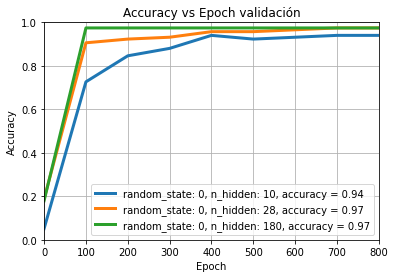

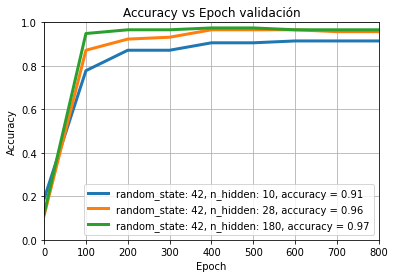

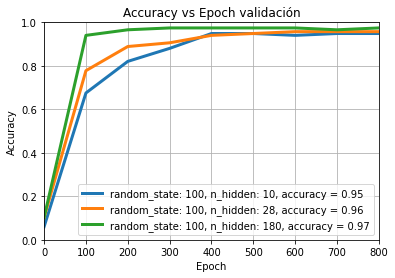

In [ ]:
#SIGMOID
def multilayer_perceptron(x, weights, biases, keep_prob):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    layer_1 = tf.nn.dropout(layer_1, keep_prob)
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer
    #
#NUMERO DE NEURONAS EN CAPA OCULTA A ITERAR
n_hidden_1 =np.array([10, 28, 180])
random_state = np.array([0, 42, 100])
Matrx_test_accuracy_results =np.zeros((random_state.shape[0],n_hidden_1.shape[0]))
Cxf=[]#MATRIZ DE CONFUSION
Cxf_T=[]
for k in range(0,random_state.shape[0]):
    print('RANDOM_STATE = '+str(random_state[k]))
    np.random.seed(random_state[k])
    tf.set_random_seed(random_state[k])#RESIDUO ALETORIO
    rs=random_state[k]
    #INICIALIZACION DE LA FIGURA 
    plt.figure()
    for j in range(0,n_hidden_1.shape[0]): 
        n_input = X.shape[1]   #numero caracteristicas de entradas=64
        n_classes = y_True.shape[1] #numero de clases
        #
        weights = {'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1[j]])),'out': tf.Variable(tf.random_normal([n_hidden_1[j], n_classes]))}
        #
        biases = {'b1': tf.Variable(tf.random_normal([n_hidden_1[j]])),'out': tf.Variable(tf.random_normal([n_classes]))}
        #
        keep_prob = tf.placeholder("float")
        #
        training_epochs = 800
        display_step = 100
        batch_size = 32
        #
        x = tf.placeholder("float", [None, n_input])
        y = tf.placeholder("float", [None, n_classes])
        #
        predictions = multilayer_perceptron(x, weights, biases, keep_prob)
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))
        #
        optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
        #IMPORTAR MODELO TIME PARA MEDIR EL TIEMPO
        import time 
        #
        valid_accuracy_results_sig_0 = []
        test_accuracy_results=[] #ACCURACY EN EL CONJUNTO DE PRUEBA
        #
        #
        Avg_cost_sig_0 =np.zeros((training_epochs))
        EPOCHES_sig_0 =[]
        nnco=n_hidden_1[j]
        #
        # Launch the graph
        with tf.Session() as sess:
            # setup the variable initialisation
            sess.run(tf.global_variables_initializer())
            # Training cycle
            t0 = time.time()#TIEMPO DE ENTRENAMIENTO
            print('')
            print('Numero Neuronas capa oculta = '+str(nnco))
            #
            for epoch in range(training_epochs):
                #
                avg_cost_sig_0  = 0.0
                total_batch = int(len(X_Training) / batch_size)
                #
                x_batches = np.array_split(X_Training, total_batch)
                y_batches = np.array_split(y_True_Training, total_batch)
                # Loop over all batches
                for i in range(total_batch):
                    batch_x, batch_y = x_batches[i], y_batches[i]
                    # Run optimization op (backprop) and cost op (to get loss value)
                    _, c = sess.run([optimizer, cost],feed_dict={x: batch_x, y: batch_y, keep_prob: 0.8})
                    # Compute average loss
                    avg_cost_sig_0  += c / total_batch
                #
                Avg_cost_sig_0 [epoch] = avg_cost_sig_0  
                #T_end=(time.time() - t0)*100
                if epoch % display_step == 0:#cada cuanto se despliega el coste
                    EPOCHES_sig_0 .append(epoch)
                    print("Epoch:", '%04d' % (epoch+1), "cost=","{:.9f}" .format(avg_cost_sig_0 ))
                    correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
                    accuracy_sig_0  = tf.reduce_mean(tf.cast(correct_prediction, "float"))
                    r=accuracy_sig_0 .eval({x: X_Val, y: y_True_Val, keep_prob: 1.0})
                    valid_accuracy_results_sig_0.append(r)
                    #
                    print(str(epoch)+'-'+'Accuracy validation:', r)
                    #print('step cost:'+str(T_end)+'seg')
                    #print('')
            print("Optimization Finished!")
            T_end=(time.time() - t0)  
            print('El Tiempo de entrenaniento total para '+str(nnco)+' neuronas en la capa oculta es '+str(np.round(T_end,decimals=2))+' [seg]')
            # Test model validacion
            correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
            #
            accuracys_sig_0  = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            valid_accuracy_results_sig_0.append(accuracys_sig_0.eval({x: X_Val, y: y_True_Val, keep_prob: 1.0}))
            valid_accuracy_result_sig_0=np.array(valid_accuracy_results_sig_0)
            #
            test_accuracy_0=tf.reduce_mean(tf.cast(correct_prediction, "float"))
            test_accuracy_results_0=test_accuracy_0.eval({x: X_Test, y: y_True_Test, keep_prob: 1.0})
            test_accuracy_result_0=np.array(test_accuracy_results_0)
            #
            EPOCHES_sig_0.append(800)
            EPOCHES_sig_0=np.array(EPOCHES_sig_0)
            #
            print('Accuracy validation:', accuracys_sig_0.eval({x: X_Val, y: y_True_Val, keep_prob: 1.0}))
            print('Confusion matrix validation')
            #
            confm_sig_0 = tf.confusion_matrix(tf.argmax(y,1),tf.argmax(predictions, 1), num_classes = y_True_Val.shape[1])
            C=confm_sig_0.eval({x: X_Val, y: y_True_Val, keep_prob: 1.0})
            C=np.round(C/C.astype(np.float).sum(axis=1),decimals=2)    
            print(C)
            #
            #MATRIZ DE CONFUSION PARA EL CONJUNTO DE PRUEBA
            confm_test = tf.confusion_matrix(tf.argmax(y,1),tf.argmax(predictions, 1), num_classes = y_True_Test.shape[1])
            C_test=confm_test.eval({x: X_Test, y: y_True_Test, keep_prob: 1.0})
            C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2) 
            #
            Cxf.append(C_test) 
            #
            plt.plot(EPOCHES_sig_0,valid_accuracy_result_sig_0,linewidth=3, linestyle='-',label='random_state: '+str(rs)+', n_hidden: '+str(nnco)+', accuracy = %0.2f' % valid_accuracy_result_sig_0[8])
            plt.title('Accuracy vs Epoch validación')
            plt.grid(True)
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend(loc="lower right")
            plt.xlim(0,800)
            plt.ylim(0,1)
            #            
        #
        Cxf_T.append(C_test)
        Matrx_test_accuracy_results[k,j]=test_accuracy_result_0

In [ ]:
#Matrx_test_accuracy_results
#INTERAZA LA ULTIMA COLUMNA EN CASO DE ESCOGER EL MEJOR MODELO PARA SIGMOID
Matrx_test_accuracy_results

array([[0.69444442, 0.66666669, 0.68888891],
       [0.63333333, 0.64444447, 0.71111113],
       [0.66666669, 0.67777777, 0.69444442]])

RANDOM_STATE = 0

Numero Neuronas capa oculta = 5
Epoch: 0001 cost= 11.810216291
0-Accuracy validation: 0.11111111
Epoch: 0101 cost= 1.526208401
100-Accuracy validation: 0.5811966
Epoch: 0201 cost= 1.070101491
200-Accuracy validation: 0.73504275
Epoch: 0301 cost= 0.861870259
300-Accuracy validation: 0.8119658
Epoch: 0401 cost= 0.751718074
400-Accuracy validation: 0.8119658
Epoch: 0501 cost= 0.686493086
500-Accuracy validation: 0.85470086
Epoch: 0601 cost= 0.659998896
600-Accuracy validation: 0.8803419
Epoch: 0701 cost= 0.538254035
700-Accuracy validation: 0.8974359
Optimization Finished!
El Tiempo de entrenaniento total para 5 neuronas en la capa oculta es 14.28 [seg]
Accuracy validation: 0.8803419
Confusion matrix validation


<ipython-input-41-302823991b69>:113: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C/C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.75 0.23 0.   0.   0.   0.07 0.   0.  ]
 [0.   0.06 0.85 0.   0.   0.   0.07 0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.11 0.85 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.12 0.08 0.   0.   0.15 0.   0.12 0.57]]


<ipython-input-41-302823991b69>:119: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)



Numero Neuronas capa oculta = 25
Epoch: 0001 cost= 37.877665383
0-Accuracy validation: 0.08547009
Epoch: 0101 cost= 1.811226225
100-Accuracy validation: 0.7863248
Epoch: 0201 cost= 0.759063112
200-Accuracy validation: 0.85470086
Epoch: 0301 cost= 0.200357611
300-Accuracy validation: 0.9145299
Epoch: 0401 cost= 0.130255850
400-Accuracy validation: 0.8974359
Epoch: 0501 cost= 0.165689784
500-Accuracy validation: 0.9145299
Epoch: 0601 cost= 0.059759392
600-Accuracy validation: 0.9230769
Epoch: 0701 cost= 0.061755650
700-Accuracy validation: 0.93162394
Optimization Finished!
El Tiempo de entrenaniento total para 25 neuronas en la capa oculta es 15.03 [seg]
Accuracy validation: 0.9230769
Confusion matrix validation


<ipython-input-41-302823991b69>:113: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C/C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.81 0.15 0.   0.   0.   0.07 0.   0.  ]
 [0.   0.19 0.77 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.91 0.   0.   0.07 0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.06 0.08 0.   0.   0.   0.   0.   0.86]]


<ipython-input-41-302823991b69>:119: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)



Numero Neuronas capa oculta = 180
Epoch: 0001 cost= 106.034055437
0-Accuracy validation: 0.11965812
Epoch: 0101 cost= 1.053166548
100-Accuracy validation: 0.93162394
Epoch: 0201 cost= 0.569355916
200-Accuracy validation: 0.95726496
Epoch: 0301 cost= 0.151251353
300-Accuracy validation: 0.96581197
Epoch: 0401 cost= 0.132273114
400-Accuracy validation: 0.96581197
Epoch: 0501 cost= 0.000000022
500-Accuracy validation: 0.96581197
Epoch: 0601 cost= 0.032503592
600-Accuracy validation: 0.96581197
Epoch: 0701 cost= 0.024984162
700-Accuracy validation: 0.96581197
Optimization Finished!
El Tiempo de entrenaniento total para 180 neuronas en la capa oculta es 18.08 [seg]
Accuracy validation: 0.96581197
Confusion matrix validation


<ipython-input-41-302823991b69>:113: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C/C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.11 0.81 0.15 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.08 0.   0.   0.93]]


<ipython-input-41-302823991b69>:119: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


RANDOM_STATE = 42

Numero Neuronas capa oculta = 5
Epoch: 0001 cost= 13.696367877
0-Accuracy validation: 0.15384616
Epoch: 0101 cost= 1.977821546
100-Accuracy validation: 0.35042736
Epoch: 0201 cost= 1.249842039
200-Accuracy validation: 0.4871795
Epoch: 0301 cost= 1.078282812
300-Accuracy validation: 0.60683763
Epoch: 0401 cost= 0.948311142
400-Accuracy validation: 0.72649574
Epoch: 0501 cost= 0.794854545
500-Accuracy validation: 0.7606838
Epoch: 0601 cost= 0.750754859
600-Accuracy validation: 0.82051283
Epoch: 0701 cost= 0.728453210
700-Accuracy validation: 0.84615386
Optimization Finished!
El Tiempo de entrenaniento total para 5 neuronas en la capa oculta es 13.39 [seg]
Accuracy validation: 0.84615386
Confusion matrix validation


<ipython-input-41-302823991b69>:113: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C/C.astype(np.float).sum(axis=1),decimals=2)


[[0.89 0.   0.   0.   0.   0.   0.   0.   0.07]
 [0.   0.75 0.08 0.09 0.   0.08 0.   0.   0.07]
 [0.   0.   0.62 0.   0.   0.   0.   0.   0.36]
 [0.22 0.   0.   0.82 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.89 0.   0.14 0.   0.  ]
 [0.   0.06 0.   0.   0.   0.92 0.   0.   0.  ]
 [0.11 0.   0.   0.   0.   0.   0.93 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.06 0.   0.   0.   0.08 0.   0.   0.86]]


<ipython-input-41-302823991b69>:119: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)



Numero Neuronas capa oculta = 25
Epoch: 0001 cost= 46.427608218
0-Accuracy validation: 0.05982906
Epoch: 0101 cost= 2.641266495
100-Accuracy validation: 0.82905984
Epoch: 0201 cost= 0.684433931
200-Accuracy validation: 0.8974359
Epoch: 0301 cost= 0.379706691
300-Accuracy validation: 0.94871795
Epoch: 0401 cost= 0.281291796
400-Accuracy validation: 0.94871795
Epoch: 0501 cost= 0.128052545
500-Accuracy validation: 0.95726496
Epoch: 0601 cost= 0.070019884
600-Accuracy validation: 0.96581197
Epoch: 0701 cost= 0.070217232
700-Accuracy validation: 0.96581197
Optimization Finished!
El Tiempo de entrenaniento total para 25 neuronas en la capa oculta es 14.39 [seg]
Accuracy validation: 0.96581197
Confusion matrix validation


<ipython-input-41-302823991b69>:113: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C/C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.94 0.08 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.06 0.08 0.   0.   0.   0.   0.12 0.79]]


<ipython-input-41-302823991b69>:119: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)



Numero Neuronas capa oculta = 180
Epoch: 0001 cost= 107.154500689
0-Accuracy validation: 0.15384616
Epoch: 0101 cost= 1.781848636
100-Accuracy validation: 0.94871795
Epoch: 0201 cost= 0.370337505
200-Accuracy validation: 0.974359
Epoch: 0301 cost= 0.214175652
300-Accuracy validation: 0.974359
Epoch: 0401 cost= 0.122018225
400-Accuracy validation: 0.974359
Epoch: 0501 cost= 0.000000547
500-Accuracy validation: 0.974359
Epoch: 0601 cost= 0.022607096
600-Accuracy validation: 0.974359
Epoch: 0701 cost= 0.003816344
700-Accuracy validation: 0.974359
Optimization Finished!
El Tiempo de entrenaniento total para 180 neuronas en la capa oculta es 18.48 [seg]
Accuracy validation: 0.974359
Confusion matrix validation


<ipython-input-41-302823991b69>:113: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C/C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.11 0.81 0.15 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


<ipython-input-41-302823991b69>:119: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


RANDOM_STATE = 100

Numero Neuronas capa oculta = 5
Epoch: 0001 cost= 16.611885139
0-Accuracy validation: 0.07692308
Epoch: 0101 cost= 1.701913144
100-Accuracy validation: 0.51282054
Epoch: 0201 cost= 1.104304957
200-Accuracy validation: 0.6837607
Epoch: 0301 cost= 0.955574278
300-Accuracy validation: 0.7606838
Epoch: 0401 cost= 0.897341843
400-Accuracy validation: 0.7692308
Epoch: 0501 cost= 0.783149821
500-Accuracy validation: 0.7863248
Epoch: 0601 cost= 0.731865857
600-Accuracy validation: 0.7863248
Epoch: 0701 cost= 0.677740274
700-Accuracy validation: 0.82051283
Optimization Finished!
El Tiempo de entrenaniento total para 5 neuronas en la capa oculta es 14.06 [seg]
Accuracy validation: 0.8119658
Confusion matrix validation


<ipython-input-41-302823991b69>:113: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C/C.astype(np.float).sum(axis=1),decimals=2)


[[0.44 0.   0.08 0.18 0.   0.   0.   0.12 0.07]
 [0.   0.75 0.23 0.   0.   0.   0.07 0.   0.  ]
 [0.   0.25 0.54 0.   0.   0.   0.   0.12 0.07]
 [0.   0.   0.   0.91 0.   0.   0.07 0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.92 0.   0.12 0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.08 0.   0.5  0.64]]


<ipython-input-41-302823991b69>:119: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)



Numero Neuronas capa oculta = 25
Epoch: 0001 cost= 40.322204181
0-Accuracy validation: 0.094017096
Epoch: 0101 cost= 1.778256378
100-Accuracy validation: 0.8119658
Epoch: 0201 cost= 0.638742683
200-Accuracy validation: 0.8632479
Epoch: 0301 cost= 0.277050271
300-Accuracy validation: 0.9059829
Epoch: 0401 cost= 0.162365750
400-Accuracy validation: 0.9059829
Epoch: 0501 cost= 0.098347326
500-Accuracy validation: 0.93162394
Epoch: 0601 cost= 0.057311199
600-Accuracy validation: 0.93162394
Epoch: 0701 cost= 0.093360012
700-Accuracy validation: 0.94017094
Optimization Finished!
El Tiempo de entrenaniento total para 25 neuronas en la capa oculta es 16.18 [seg]
Accuracy validation: 0.94871795
Confusion matrix validation


<ipython-input-41-302823991b69>:113: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C/C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.11 0.81 0.08 0.   0.   0.   0.   0.   0.07]
 [0.   0.12 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.12 0.93]]


<ipython-input-41-302823991b69>:119: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)



Numero Neuronas capa oculta = 180
Epoch: 0001 cost= 110.747528076
0-Accuracy validation: 0.07692308
Epoch: 0101 cost= 1.533030957
100-Accuracy validation: 0.94017094
Epoch: 0201 cost= 0.440054672
200-Accuracy validation: 0.96581197
Epoch: 0301 cost= 0.155248891
300-Accuracy validation: 0.982906
Epoch: 0401 cost= 0.093098728
400-Accuracy validation: 0.982906
Epoch: 0501 cost= 0.251226142
500-Accuracy validation: 0.982906
Epoch: 0601 cost= 0.000783406
600-Accuracy validation: 0.982906
Epoch: 0701 cost= 0.000001512
700-Accuracy validation: 0.974359
Optimization Finished!
El Tiempo de entrenaniento total para 180 neuronas en la capa oculta es 19.33 [seg]
Accuracy validation: 0.982906
Confusion matrix validation


<ipython-input-41-302823991b69>:113: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C/C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.88 0.15 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


<ipython-input-41-302823991b69>:119: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


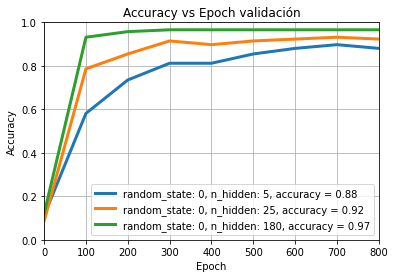

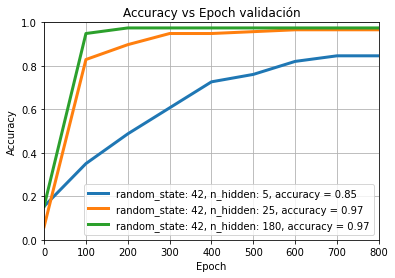

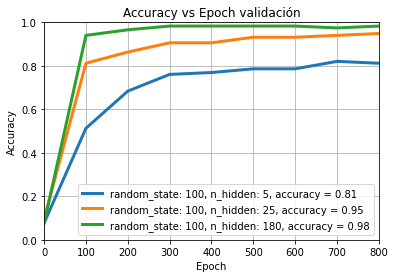

In [ ]:
#RELU
def multilayer_perceptron(x, weights, biases, keep_prob):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_1 = tf.nn.dropout(layer_1, keep_prob)
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer
    #
#NUMERO DE NEURONAS EN CAPA OCULTA A ITERAR
n_hidden_1 =np.array([5, 25, 180])
random_state = np.array([0, 42, 100])
Matrx_test_accuracy_results_RElu =np.zeros((random_state.shape[0],n_hidden_1.shape[0]))
Cxf=[]#MATRIZ DE CONFUSION
Cxf_T=[]
for k in range(0,random_state.shape[0]):
    print('RANDOM_STATE = '+str(random_state[k]))
    np.random.seed(random_state[k])
    tf.set_random_seed(random_state[k])#RESIDUO ALETORIO
    rs=random_state[k]
    #INICIALIZACION DE LA FIGURA 
    plt.figure()
    for j in range(0,n_hidden_1.shape[0]): 
        n_input = X.shape[1]   #numero caracteristicas de entradas=64
        n_classes = y_True.shape[1] #numero de clases
        #
        weights = {'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1[j]])),'out': tf.Variable(tf.random_normal([n_hidden_1[j], n_classes]))}
        #
        biases = {'b1': tf.Variable(tf.random_normal([n_hidden_1[j]])),'out': tf.Variable(tf.random_normal([n_classes]))}
        #
        keep_prob = tf.placeholder("float")
        #
        training_epochs = 800
        display_step = 100
        batch_size = 32
        #
        x = tf.placeholder("float", [None, n_input])
        y = tf.placeholder("float", [None, n_classes])
        #
        predictions = multilayer_perceptron(x, weights, biases, keep_prob)
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))
        #
        optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
        #IMPORTAR MODELO TIME PARA MEDIR EL TIEMPO
        import time 
        #
        valid_accuracy_results_sig_0 = []
        test_accuracy_results=[] #ACCURACY EN EL CONJUNTO DE PRUEBA
        #
        #
        Avg_cost_sig_0 =np.zeros((training_epochs))
        EPOCHES_sig_0 =[]
        nnco=n_hidden_1[j]
        #
        # Launch the graph
        with tf.Session() as sess:
            # setup the variable initialisation
            sess.run(tf.global_variables_initializer())
            # Training cycle
            t0 = time.time()#TIEMPO DE ENTRENAMIENTO
            print('')
            print('Numero Neuronas capa oculta = '+str(nnco))
            #
            for epoch in range(training_epochs):
                #
                avg_cost_sig_0  = 0.0
                total_batch = int(len(X_Training) / batch_size)
                #
                x_batches = np.array_split(X_Training, total_batch)
                y_batches = np.array_split(y_True_Training, total_batch)
                # Loop over all batches
                for i in range(total_batch):
                    batch_x, batch_y = x_batches[i], y_batches[i]
                    # Run optimization op (backprop) and cost op (to get loss value)
                    _, c = sess.run([optimizer, cost],feed_dict={x: batch_x, y: batch_y, keep_prob: 0.8})
                    # Compute average loss
                    avg_cost_sig_0  += c / total_batch
                #
                Avg_cost_sig_0 [epoch] = avg_cost_sig_0  
                #T_end=(time.time() - t0)*100
                if epoch % display_step == 0:#cada cuanto se despliega el coste
                    EPOCHES_sig_0 .append(epoch)
                    print("Epoch:", '%04d' % (epoch+1), "cost=","{:.9f}" .format(avg_cost_sig_0 ))
                    correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
                    accuracy_sig_0  = tf.reduce_mean(tf.cast(correct_prediction, "float"))
                    r=accuracy_sig_0 .eval({x: X_Val, y: y_True_Val, keep_prob: 1.0})
                    valid_accuracy_results_sig_0.append(r)
                    #
                    print(str(epoch)+'-'+'Accuracy validation:', r)
                    #print('step cost:'+str(T_end)+'seg')
                    #print('')
            print("Optimization Finished!")
            T_end=(time.time() - t0)  
            print('El Tiempo de entrenaniento total para '+str(nnco)+' neuronas en la capa oculta es '+str(np.round(T_end,decimals=2))+' [seg]')
            # Test model validacion
            correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
            #
            accuracys_sig_0  = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            valid_accuracy_results_sig_0.append(accuracys_sig_0.eval({x: X_Val, y: y_True_Val, keep_prob: 1.0}))
            valid_accuracy_result_sig_0=np.array(valid_accuracy_results_sig_0)
            #
            test_accuracy_0=tf.reduce_mean(tf.cast(correct_prediction, "float"))
            test_accuracy_results_0=test_accuracy_0.eval({x: X_Test, y: y_True_Test, keep_prob: 1.0})
            test_accuracy_result_0=np.array(test_accuracy_results_0)
            #
            EPOCHES_sig_0.append(800)
            EPOCHES_sig_0=np.array(EPOCHES_sig_0)
            #
            print('Accuracy validation:', accuracys_sig_0.eval({x: X_Val, y: y_True_Val, keep_prob: 1.0}))
            print('Confusion matrix validation')
            #
            confm_sig_0 = tf.confusion_matrix(tf.argmax(y,1),tf.argmax(predictions, 1), num_classes = y_True_Val.shape[1])
            C=confm_sig_0.eval({x: X_Val, y: y_True_Val, keep_prob: 1.0})
            C=np.round(C/C.astype(np.float).sum(axis=1),decimals=2)    
            print(C)
            #
            #MATRIZ DE CONFUSION PARA EL CONJUNTO DE PRUEBA
            confm_test = tf.confusion_matrix(tf.argmax(y,1),tf.argmax(predictions, 1), num_classes = y_True_Test.shape[1])
            C_test=confm_test.eval({x: X_Test, y: y_True_Test, keep_prob: 1.0})
            C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2) 
            #
            Cxf.append(C_test) 
            #
            plt.plot(EPOCHES_sig_0,valid_accuracy_result_sig_0,linewidth=3, linestyle='-',label='random_state: '+str(rs)+', n_hidden: '+str(nnco)+', accuracy = %0.2f' % valid_accuracy_result_sig_0[8])
            plt.title('Accuracy vs Epoch validación')
            plt.grid(True)
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend(loc="lower right")
            plt.xlim(0,800)
            plt.ylim(0,1)
            #            
        #
        Cxf_T.append(C_test)
        Matrx_test_accuracy_results_RElu[k,j]=test_accuracy_result_0

In [ ]:
#Matrx_test_accuracy_results
#INTERAZA LA ULTIMA COLUMNA EN CASO DE ESCOGER EL MEJOR MODELO PARA SIGMOID
Matrx_test_accuracy_results_RElu

array([[0.58333331, 0.61666667, 0.71111113],
       [0.62777776, 0.6388889 , 0.68333334],
       [0.54444444, 0.66666669, 0.69444442]])

Tiempo preprocesamiento entrenamiento con ventana de 90 datos y paso de 25: 12.695303201675415 seg
Tiempo preprocesamiento prueba con ventana de 90 datos y paso de 25: 16.003528118133545 seg
Epoch: 0001 cost= 4.224850055
0-Accuracy validation: 0.20989761

Epoch: 0101 cost= 0.073788569
100-Accuracy validation: 0.9820819

Epoch: 0201 cost= 0.036576903
200-Accuracy validation: 0.98805463

Epoch: 0301 cost= 0.027788355
300-Accuracy validation: 0.9889079

Epoch: 0401 cost= 0.024637231
400-Accuracy validation: 0.9897611

Epoch: 0501 cost= 0.022107905
500-Accuracy validation: 0.99061435

Epoch: 0601 cost= 0.019581846
600-Accuracy validation: 0.9889079

Epoch: 0701 cost= 0.017188424
700-Accuracy validation: 0.9897611

Optimization Finished!
Tiempo de entrenaniento total132.0seg
Accuracy validation: 0.99232084
Confusion matrix validation


<ipython-input-47-e9c9a28dc5bb>:257: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C / C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.99 0.01 0.   0.   0.   0.   0.   0.  ]
 [0.01 0.01 0.96 0.   0.   0.   0.01 0.   0.01]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.99 0.01 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.99 0.   0.   0.01]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.01 0.   0.99 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


<ipython-input-47-e9c9a28dc5bb>:263: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


Tiempo preprocesamiento entrenamiento con ventana de 90 datos y paso de 100: 4.273446083068848 seg
Tiempo preprocesamiento prueba con ventana de 90 datos y paso de 100: 5.625232934951782 seg
Epoch: 0001 cost= 7.947291917
0-Accuracy validation: 0.054607507

Epoch: 0101 cost= 0.287572659
100-Accuracy validation: 0.9215017

Epoch: 0201 cost= 0.109166487
200-Accuracy validation: 0.9522184

Epoch: 0301 cost= 0.065998129
300-Accuracy validation: 0.9590444

Epoch: 0401 cost= 0.038766010
400-Accuracy validation: 0.96245736

Epoch: 0501 cost= 0.029654196
500-Accuracy validation: 0.96245736

Epoch: 0601 cost= 0.019150305
600-Accuracy validation: 0.9658703

Epoch: 0701 cost= 0.018827177
700-Accuracy validation: 0.9692833

Optimization Finished!
Tiempo de entrenaniento total35.0seg
Accuracy validation: 0.9658703
Confusion matrix validation


<ipython-input-47-e9c9a28dc5bb>:257: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C / C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.86 0.1  0.   0.   0.   0.   0.03 0.03]
 [0.   0.03 0.93 0.   0.   0.   0.03 0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.97 0.03]
 [0.   0.   0.   0.   0.   0.   0.   0.05 0.94]]


<ipython-input-47-e9c9a28dc5bb>:263: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


Tiempo preprocesamiento entrenamiento con ventana de 90 datos y paso de 125: 4.786875247955322 seg
Tiempo preprocesamiento prueba con ventana de 90 datos y paso de 125: 5.999715328216553 seg
Epoch: 0001 cost= 5.000157751
0-Accuracy validation: 0.13675214

Epoch: 0101 cost= 0.338909706
100-Accuracy validation: 0.8888889

Epoch: 0201 cost= 0.142379925
200-Accuracy validation: 0.93162394

Epoch: 0301 cost= 0.081421523
300-Accuracy validation: 0.94017094

Epoch: 0401 cost= 0.051920713
400-Accuracy validation: 0.94871795

Epoch: 0501 cost= 0.028383482
500-Accuracy validation: 0.96153843

Epoch: 0601 cost= 0.022537007
600-Accuracy validation: 0.96581197

Epoch: 0701 cost= 0.026758833
700-Accuracy validation: 0.96153843

Optimization Finished!
Tiempo de entrenaniento total30.0seg
Accuracy validation: 0.95726496
Confusion matrix validation


<ipython-input-47-e9c9a28dc5bb>:257: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C / C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.83 0.11 0.   0.   0.   0.09 0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.94 0.03 0.   0.03 0.  ]
 [0.   0.   0.   0.   0.03 0.93 0.   0.   0.03]
 [0.   0.   0.04 0.   0.   0.   0.96 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


<ipython-input-47-e9c9a28dc5bb>:263: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


Tiempo preprocesamiento entrenamiento con ventana de 90 datos y paso de 250: 2.981930732727051 seg
Tiempo preprocesamiento prueba con ventana de 90 datos y paso de 250: 3.881706953048706 seg
Epoch: 0001 cost= 7.319651740
0-Accuracy validation: 0.07692308

Epoch: 0101 cost= 0.743739120
100-Accuracy validation: 0.82905984

Epoch: 0201 cost= 0.306105221
200-Accuracy validation: 0.8632479

Epoch: 0301 cost= 0.202328325
300-Accuracy validation: 0.9230769

Epoch: 0401 cost= 0.148895563
400-Accuracy validation: 0.93162394

Epoch: 0501 cost= 0.096224499
500-Accuracy validation: 0.93162394

Epoch: 0601 cost= 0.063195758
600-Accuracy validation: 0.94871795

Epoch: 0701 cost= 0.052460308
700-Accuracy validation: 0.94871795

Optimization Finished!
Tiempo de entrenaniento total17.0seg
Accuracy validation: 0.95726496
Confusion matrix validation


<ipython-input-47-e9c9a28dc5bb>:257: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C / C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.11 0.81 0.08 0.   0.   0.   0.   0.   0.07]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.11 0.   0.   0.91 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.12 0.93]]


<ipython-input-47-e9c9a28dc5bb>:263: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


Tiempo preprocesamiento entrenamiento con ventana de 100 datos y paso de 25: 11.253432512283325 seg
Tiempo preprocesamiento prueba con ventana de 100 datos y paso de 25: 15.548377990722656 seg
Epoch: 0001 cost= 4.668734547
0-Accuracy validation: 0.2662116

Epoch: 0101 cost= 0.069696960
100-Accuracy validation: 0.98805463

Epoch: 0201 cost= 0.038196389
200-Accuracy validation: 0.9897611

Epoch: 0301 cost= 0.024171743
300-Accuracy validation: 0.9914676

Epoch: 0401 cost= 0.023273858
400-Accuracy validation: 0.9914676

Epoch: 0501 cost= 0.020401984
500-Accuracy validation: 0.9914676

Epoch: 0601 cost= 0.013000134
600-Accuracy validation: 0.99232084

Epoch: 0701 cost= 0.012795652
700-Accuracy validation: 0.9931741

Optimization Finished!
Tiempo de entrenaniento total128.0seg
Accuracy validation: 0.99232084
Confusion matrix validation


<ipython-input-47-e9c9a28dc5bb>:257: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C / C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.99 0.01 0.   0.   0.   0.   0.   0.  ]
 [0.01 0.01 0.96 0.   0.   0.01 0.01 0.   0.01]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.99 0.01 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


<ipython-input-47-e9c9a28dc5bb>:263: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


Tiempo preprocesamiento entrenamiento con ventana de 100 datos y paso de 100: 5.248642921447754 seg
Tiempo preprocesamiento prueba con ventana de 100 datos y paso de 100: 6.907696485519409 seg
Epoch: 0001 cost= 8.006796095
0-Accuracy validation: 0.051194537

Epoch: 0101 cost= 0.265141237
100-Accuracy validation: 0.91808873

Epoch: 0201 cost= 0.124147214
200-Accuracy validation: 0.93174064

Epoch: 0301 cost= 0.056971021
300-Accuracy validation: 0.94880545

Epoch: 0401 cost= 0.055446884
400-Accuracy validation: 0.9590444

Epoch: 0501 cost= 0.036296511
500-Accuracy validation: 0.9556314

Epoch: 0601 cost= 0.033601847
600-Accuracy validation: 0.9556314

Epoch: 0701 cost= 0.013655489
700-Accuracy validation: 0.9522184

Optimization Finished!
Tiempo de entrenaniento total36.0seg
Accuracy validation: 0.9590444
Confusion matrix validation


<ipython-input-47-e9c9a28dc5bb>:257: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C / C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.83 0.17 0.   0.   0.   0.   0.   0.03]
 [0.   0.   0.97 0.04 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.02 0.97 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.95 0.06]
 [0.   0.   0.   0.   0.   0.   0.   0.05 0.94]]


<ipython-input-47-e9c9a28dc5bb>:263: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


Tiempo preprocesamiento entrenamiento con ventana de 100 datos y paso de 125: 3.805861234664917 seg
Tiempo preprocesamiento prueba con ventana de 100 datos y paso de 125: 5.001609802246094 seg
Epoch: 0001 cost= 5.353622404
0-Accuracy validation: 0.13675214

Epoch: 0101 cost= 0.292445809
100-Accuracy validation: 0.8717949

Epoch: 0201 cost= 0.125421590
200-Accuracy validation: 0.93162394

Epoch: 0301 cost= 0.065172132
300-Accuracy validation: 0.94017094

Epoch: 0401 cost= 0.047821028
400-Accuracy validation: 0.94871795

Epoch: 0501 cost= 0.043366086
500-Accuracy validation: 0.94871795

Epoch: 0601 cost= 0.033313136
600-Accuracy validation: 0.9529914

Epoch: 0701 cost= 0.030735116
700-Accuracy validation: 0.9444444

Optimization Finished!
Tiempo de entrenaniento total31.0seg
Accuracy validation: 0.9529914
Confusion matrix validation


<ipython-input-47-e9c9a28dc5bb>:257: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C / C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.11 0.79 0.11 0.   0.   0.   0.09 0.   0.  ]
 [0.   0.   0.96 0.   0.   0.   0.   0.   0.03]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.97 0.03 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.04 0.   0.   0.   0.96 0.   0.  ]
 [0.   0.03 0.   0.   0.   0.   0.   0.93 0.03]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


<ipython-input-47-e9c9a28dc5bb>:263: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


Tiempo preprocesamiento entrenamiento con ventana de 100 datos y paso de 250: 2.89306640625 seg
Tiempo preprocesamiento prueba con ventana de 100 datos y paso de 250: 3.818376302719116 seg
Epoch: 0001 cost= 6.704999004
0-Accuracy validation: 0.102564104

Epoch: 0101 cost= 0.763547301
100-Accuracy validation: 0.84615386

Epoch: 0201 cost= 0.392821758
200-Accuracy validation: 0.9059829

Epoch: 0301 cost= 0.233414250
300-Accuracy validation: 0.9230769

Epoch: 0401 cost= 0.176967309
400-Accuracy validation: 0.93162394

Epoch: 0501 cost= 0.084456666
500-Accuracy validation: 0.94871795

Epoch: 0601 cost= 0.071598669
600-Accuracy validation: 0.94871795

Epoch: 0701 cost= 0.048330192
700-Accuracy validation: 0.95726496

Optimization Finished!
Tiempo de entrenaniento total19.0seg
Accuracy validation: 0.96581197
Confusion matrix validation


<ipython-input-47-e9c9a28dc5bb>:257: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C / C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.88 0.08 0.   0.   0.   0.07 0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.95 0.   0.   0.   0.07]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.12 0.93]]


<ipython-input-47-e9c9a28dc5bb>:263: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


Tiempo preprocesamiento entrenamiento con ventana de 250 datos y paso de 25: 15.760778903961182 seg
Tiempo preprocesamiento prueba con ventana de 250 datos y paso de 25: 20.818909168243408 seg
Epoch: 0001 cost= 4.618803344
0-Accuracy validation: 0.29948807

Epoch: 0101 cost= 0.064581203
100-Accuracy validation: 0.9889079

Epoch: 0201 cost= 0.030492004
200-Accuracy validation: 0.9914676

Epoch: 0301 cost= 0.025084658
300-Accuracy validation: 0.9940273

Epoch: 0401 cost= 0.020064446
400-Accuracy validation: 0.99232084

Epoch: 0501 cost= 0.021013721
500-Accuracy validation: 0.9940273

Epoch: 0601 cost= 0.015093026
600-Accuracy validation: 0.9940273

Epoch: 0701 cost= 0.012078326
700-Accuracy validation: 0.9931741

Optimization Finished!
Tiempo de entrenaniento total129.0seg
Accuracy validation: 0.9931741
Confusion matrix validation


<ipython-input-47-e9c9a28dc5bb>:257: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C / C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.98 0.01 0.   0.   0.   0.01 0.   0.  ]
 [0.   0.   0.98 0.01 0.   0.   0.01 0.   0.01]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.99 0.01 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.01 0.99 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


<ipython-input-47-e9c9a28dc5bb>:263: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


Tiempo preprocesamiento entrenamiento con ventana de 250 datos y paso de 100: 6.3120198249816895 seg
Tiempo preprocesamiento prueba con ventana de 250 datos y paso de 100: 7.94345760345459 seg
Epoch: 0001 cost= 5.194406993
0-Accuracy validation: 0.19795223

Epoch: 0101 cost= 0.272643141
100-Accuracy validation: 0.94880545

Epoch: 0201 cost= 0.109756205
200-Accuracy validation: 0.9692833

Epoch: 0301 cost= 0.060736493
300-Accuracy validation: 0.97952217

Epoch: 0401 cost= 0.041798969
400-Accuracy validation: 0.9897611

Epoch: 0501 cost= 0.021643233
500-Accuracy validation: 0.9931741

Epoch: 0601 cost= 0.017962320
600-Accuracy validation: 0.9931741

Epoch: 0701 cost= 0.019028895
700-Accuracy validation: 0.9931741

Optimization Finished!
Tiempo de entrenaniento total38.0seg
Accuracy validation: 0.9931741
Confusion matrix validation


<ipython-input-47-e9c9a28dc5bb>:257: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C / C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.03 0.   0.97 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.03 0.97]]


<ipython-input-47-e9c9a28dc5bb>:263: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


Tiempo preprocesamiento entrenamiento con ventana de 250 datos y paso de 125: 5.699187994003296 seg
Tiempo preprocesamiento prueba con ventana de 250 datos y paso de 125: 7.171357870101929 seg
Epoch: 0001 cost= 4.721473710
0-Accuracy validation: 0.123931624

Epoch: 0101 cost= 0.260456900
100-Accuracy validation: 0.9188034

Epoch: 0201 cost= 0.095641538
200-Accuracy validation: 0.96153843

Epoch: 0301 cost= 0.055225617
300-Accuracy validation: 0.97008544

Epoch: 0401 cost= 0.042604050
400-Accuracy validation: 0.97863245

Epoch: 0501 cost= 0.016920107
500-Accuracy validation: 0.97863245

Epoch: 0601 cost= 0.021351564
600-Accuracy validation: 0.97863245

Epoch: 0701 cost= 0.014485979
700-Accuracy validation: 0.974359

Optimization Finished!
Tiempo de entrenaniento total32.0seg
Accuracy validation: 0.974359
Confusion matrix validation


<ipython-input-47-e9c9a28dc5bb>:257: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C / C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.79 0.18 0.   0.   0.   0.   0.   0.03]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


<ipython-input-47-e9c9a28dc5bb>:263: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


Tiempo preprocesamiento entrenamiento con ventana de 250 datos y paso de 250: 3.419759511947632 seg
Tiempo preprocesamiento prueba con ventana de 250 datos y paso de 250: 4.503823757171631 seg
Epoch: 0001 cost= 5.993752071
0-Accuracy validation: 0.18803419

Epoch: 0101 cost= 0.598821970
100-Accuracy validation: 0.85470086

Epoch: 0201 cost= 0.278693199
200-Accuracy validation: 0.96581197

Epoch: 0301 cost= 0.152607594
300-Accuracy validation: 0.96581197

Epoch: 0401 cost= 0.085351713
400-Accuracy validation: 0.974359

Epoch: 0501 cost= 0.050249784
500-Accuracy validation: 0.974359

Epoch: 0601 cost= 0.058637527
600-Accuracy validation: 0.974359

Epoch: 0701 cost= 0.041992189
700-Accuracy validation: 0.974359

Optimization Finished!
Tiempo de entrenaniento total20.0seg
Accuracy validation: 0.974359
Confusion matrix validation


<ipython-input-47-e9c9a28dc5bb>:257: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C / C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.94 0.08 0.   0.   0.   0.   0.   0.  ]
 [0.   0.06 0.92 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.06 0.   0.   0.   0.   0.   0.   0.93]]


<ipython-input-47-e9c9a28dc5bb>:263: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


Tiempo preprocesamiento entrenamiento con ventana de 300 datos y paso de 25: 17.4436252117157 seg
Tiempo preprocesamiento prueba con ventana de 300 datos y paso de 25: 22.019288778305054 seg
Epoch: 0001 cost= 5.316427172
0-Accuracy validation: 0.21331058

Epoch: 0101 cost= 0.054160547
100-Accuracy validation: 0.9931741

Epoch: 0201 cost= 0.027917140
200-Accuracy validation: 0.99232084

Epoch: 0301 cost= 0.017437482
300-Accuracy validation: 0.9940273

Epoch: 0401 cost= 0.013704694
400-Accuracy validation: 0.99488056

Epoch: 0501 cost= 0.009351375
500-Accuracy validation: 0.9940273

Epoch: 0601 cost= 0.013357264
600-Accuracy validation: 0.9940273

Epoch: 0701 cost= 0.009454714
700-Accuracy validation: 0.99488056

Optimization Finished!
Tiempo de entrenaniento total131.0seg
Accuracy validation: 0.9940273
Confusion matrix validation


<ipython-input-47-e9c9a28dc5bb>:257: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C / C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.98 0.01 0.   0.   0.   0.01 0.   0.  ]
 [0.   0.   0.99 0.01 0.   0.   0.   0.   0.01]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.99 0.01 0.   0.   0.  ]
 [0.   0.   0.   0.   0.01 0.99 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


<ipython-input-47-e9c9a28dc5bb>:263: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


Tiempo preprocesamiento entrenamiento con ventana de 300 datos y paso de 100: 5.4155144691467285 seg
Tiempo preprocesamiento prueba con ventana de 300 datos y paso de 100: 7.104330778121948 seg
Epoch: 0001 cost= 6.088769409
0-Accuracy validation: 0.13651878

Epoch: 0101 cost= 0.268274770
100-Accuracy validation: 0.9453925

Epoch: 0201 cost= 0.090856927
200-Accuracy validation: 0.97269624

Epoch: 0301 cost= 0.059256603
300-Accuracy validation: 0.98293513

Epoch: 0401 cost= 0.034468424
400-Accuracy validation: 0.98293513

Epoch: 0501 cost= 0.023179857
500-Accuracy validation: 0.98634815

Epoch: 0601 cost= 0.014017094
600-Accuracy validation: 0.98634815

Epoch: 0701 cost= 0.024399743
700-Accuracy validation: 0.98634815

Optimization Finished!
Tiempo de entrenaniento total38.0seg
Accuracy validation: 0.98634815
Confusion matrix validation


<ipython-input-47-e9c9a28dc5bb>:257: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C / C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.97 0.03 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.97 0.   0.   0.   0.   0.   0.03]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.02 0.97 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.03 0.97]]


<ipython-input-47-e9c9a28dc5bb>:263: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


Tiempo preprocesamiento entrenamiento con ventana de 300 datos y paso de 125: 4.79230809211731 seg
Tiempo preprocesamiento prueba con ventana de 300 datos y paso de 125: 6.6863555908203125 seg
Epoch: 0001 cost= 4.613665721
0-Accuracy validation: 0.17948718

Epoch: 0101 cost= 0.289141707
100-Accuracy validation: 0.9273504

Epoch: 0201 cost= 0.103578737
200-Accuracy validation: 0.9529914

Epoch: 0301 cost= 0.052730028
300-Accuracy validation: 0.95726496

Epoch: 0401 cost= 0.038780647
400-Accuracy validation: 0.97008544

Epoch: 0501 cost= 0.030607496
500-Accuracy validation: 0.97008544

Epoch: 0601 cost= 0.022610408
600-Accuracy validation: 0.97008544

Epoch: 0701 cost= 0.018666627
700-Accuracy validation: 0.974359

Optimization Finished!
Tiempo de entrenaniento total32.0seg
Accuracy validation: 0.974359
Confusion matrix validation


<ipython-input-47-e9c9a28dc5bb>:257: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C / C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.11 0.83 0.14 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.04 0.   0.   0.   0.   0.97 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


<ipython-input-47-e9c9a28dc5bb>:263: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


Tiempo preprocesamiento entrenamiento con ventana de 300 datos y paso de 250: 3.486868143081665 seg
Tiempo preprocesamiento prueba con ventana de 300 datos y paso de 250: 4.583413600921631 seg
Epoch: 0001 cost= 5.686106273
0-Accuracy validation: 0.20512821

Epoch: 0101 cost= 0.666859912
100-Accuracy validation: 0.8803419

Epoch: 0201 cost= 0.254414052
200-Accuracy validation: 0.9230769

Epoch: 0301 cost= 0.148163112
300-Accuracy validation: 0.95726496

Epoch: 0401 cost= 0.103126367
400-Accuracy validation: 0.96581197

Epoch: 0501 cost= 0.064757581
500-Accuracy validation: 0.96581197

Epoch: 0601 cost= 0.038208556
600-Accuracy validation: 0.982906

Epoch: 0701 cost= 0.033920404
700-Accuracy validation: 0.982906

Optimization Finished!
Tiempo de entrenaniento total21.0seg
Accuracy validation: 0.982906
Confusion matrix validation


<ipython-input-47-e9c9a28dc5bb>:257: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C=np.round(C / C.astype(np.float).sum(axis=1),decimals=2)


[[1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.88 0.08 0.   0.   0.08 0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


<ipython-input-47-e9c9a28dc5bb>:263: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2)


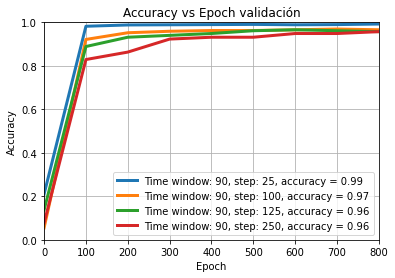

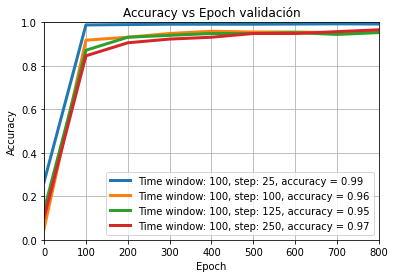

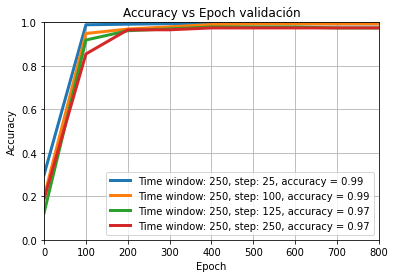

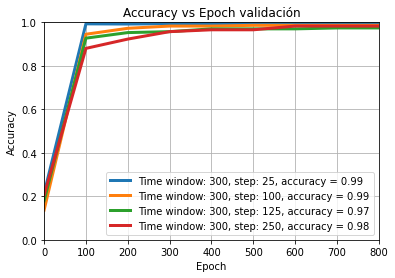

In [ ]:
##PRPOGRAMA PARA LA VARIACION DE LA VENTANA DE TIEMPO Y EL PASO PARA EL CALCULO DE CARACTERISTICAS

##PROCESAMIENTO DE LAS SEÑALES DE CADA CLASE
#PARA LA GENERACION DE UN MODEL, PARA LA FUNCION DE EXTRACCION DE CARACTERISTICAS, PARA CADA MODELO DEBE DE SER EL MISMO STEP Y VENTANA
times_windows=np.array([90,100, 250, 300])
steps=np.array([25,100,125, 250])
Matrx_test_accuracy_results =np.zeros((times_windows.shape[0],steps.shape[0]))
Cxf=[]#MATRIZ DE CONFUSION
Cxf_T=[]
for k in range(0,times_windows.shape[0]):

    # times_windows=times_windows[k]
    plt.figure()
    for j in range(0,steps.shape[0]):

      # steps=steps[j]
      #PROCESAR CONJUNOT DE ENTRENAMIENTO
      
      t_pres_training_Val=time()
      X_bikes = pres_pros(d_m_bike,0, time_window=times_windows[k],step=steps[j],butter=True)            #0
      X_climbings = pres_pros(d_m_climbing,1,time_window=times_windows[k],step=steps[j],butter=True)      #1
      X_gymbikes = pres_pros(d_m_gymbike,2,time_window=times_windows[k],step=steps[j],butter=True)       #0
      X_descendings = pres_pros(d_m_descending,3,time_window=times_windows[k],step=steps[j],butter=True)  #3
      X_standings = pres_pros(d_m_standing,4,time_window=times_windows[k],step=steps[j],butter=True)      #4
      X_walkings = pres_pros(d_m_walking,5,time_window=times_windows[k],step=steps[j],butter=True)        #5
      X_runnings = pres_pros(d_m_running,6,time_window=times_windows[k],step=steps[j],butter=True)       #6
      X_jumpings = pres_pros(d_m_jumping,7,time_window=times_windows[k],step=steps[j],butter=True)        #7
      X_treadmills = pres_pros(d_m_treadmill,8,time_window=times_windows[k],step=steps[j],butter=True)   #8
      print('Tiempo preprocesamiento entrenamiento con ventana de '+str(times_windows[k])+' datos'+' y paso de '+str(steps[j])+': ' +str(time()-t_pres_training_Val)+' seg')
      #PROCESAR CONJUNTO DE PRUEBA
      X_bikesss_Test = pres_pros(d_m_bike_Test,0,time_window=times_windows[k],step=steps[j],butter=True)              #0
      X_climbingsss_Test = pres_pros(d_m_climbing_Test,1,time_window=times_windows[k],step=steps[j],butter=True)      #1
      X_gymbikesss_Test = pres_pros(d_m_gymbike_Test,2,time_window=times_windows[k],step=steps[j],butter=True)        #0
      X_descendingsss_Test = pres_pros(d_m_descending_Test,3,time_window=times_windows[k],step=steps[j],butter=True)  #3
      X_standingsss_Test = pres_pros(d_m_standing_Test,4,time_window=times_windows[k],step=steps[j],butter=True)      #4
      X_walkingsss_Test = pres_pros(d_m_walking_Test,5,time_window=times_windows[k],step=steps[j],butter=True)       #5
      X_runningsss_Test = pres_pros(d_m_running_Test,6,time_window=times_windows[k],step=steps[j],butter=True)       #6
      X_jumpingsss_Test = pres_pros(d_m_jumping_Test,7,time_window=times_windows[k],step=steps[j],butter=True)         #7
      X_treadmillsss_Test = pres_pros(d_m_treadmill_Test,8,time_window=times_windows[k],step=steps[j],butter=True)   #8
      print('Tiempo preprocesamiento prueba con ventana de '+str(times_windows[k])+' datos'+' y paso de '+str(steps[j])+': ' +str(time()-t_pres_training_Val)+' seg')
      # TRAINING
      # INCLUYE BLANCE DE PROPORCION DE DATOS DE CADA CLASE EN CONJUNTO DE ENTRENAMIENTO(AGREGAR INFORMACION)
      X0=np.asarray(X_bikes)##
      X1=np.asarray(X_climbings)
      X2=np.asarray(X_gymbikes)##
      X3=np.asarray(X_descendings)
      X4=np.asarray(X_standings)
      X5=np.asarray(X_walkings)
      X6=np.asarray(X_runnings)#
      X7=np.asarray(X_jumpings)
      X8=np.asarray(X_treadmills)#
      ##NUMERO MIN DE OBSERVACIONES 
      # numero_min_obs=np.amin([X0.shape[0],X1.shape[0],X2.shape[0],X3.shape[0],
      #             X4.shape[0],X5.shape[0],X6.shape[0],X7.shape[0],X8.shape[0]])
      # X0=X0[:numero_min_obs,:]
      # X1=X1[:numero_min_obs,:]
      # X2=X2[:numero_min_obs,:]
      # X3=X3[:numero_min_obs,:]
      # X4=X4[:numero_min_obs,:]
      # X5=X5[:numero_min_obs,:]
      # X6=X6[:numero_min_obs,:]
      # X7=X7[:numero_min_obs,:]
      # X8=X8[:numero_min_obs,:] 
      X=np.concatenate((X0,X1,X2,X3,X4,X5,X6,X7,X8),axis=0)
      #PERMUTACION AL AZAR DE LAS FILAS(observaciones por clase)
      #X=np.random.permutation(X)
      np.random.shuffle(X) 
      X_f=X[:,0:X.shape[1]-1]#
      yy=X[:,X.shape[1]-1]
      #TEST
      X0_Test=np.asarray(X_bikesss_Test)
      X1_Test=np.asarray(X_climbingsss_Test)
      X2_Test=np.asarray(X_gymbikesss_Test)
      X3_Test=np.asarray(X_descendingsss_Test)
      X4_Test=np.asarray(X_standingsss_Test)
      X5_Test=np.asarray(X_walkingsss_Test)
      X6_Test=np.asarray(X_runningsss_Test)
      X7_Test=np.asarray(X_jumpingsss_Test)
      X8_Test=np.asarray(X_treadmillsss_Test)
      X_Test=np.concatenate((X0_Test,X1_Test,X2_Test,X3_Test,X4_Test,X5_Test,X6_Test,X7_Test,X8_Test),axis=0)
      #
      #PERMUTACION AL AZAR DE LAS FILAS(observaciones por clase)
      #X_Test=np.random.permutation(X_Test)
      np.random.shuffle(X_Test) 
      X_f_Test=X_Test[:,0:X_Test.shape[1]-1]#
      y_Test=X_Test[:,X_Test.shape[1]-1]
      #
      X = X_f
      #X_Test=scaler.fit_transform(X_f_Test) 
      X_Test = X_f_Test
      ##VECTIR CON CLASE OBSERVADAS
      y_True=yy
      y_True_Test=y_Test
      #y

      # SELECTOR DE CARACTERISTICAS 
      from sklearn.feature_selection import SelectKBest
      from sklearn.feature_selection import chi2
      KBest =  SelectKBest(chi2, k =65)
      KBest=KBest.fit(np.abs(X), y_True)
      features_Selected=KBest.get_support(indices=True)
      features_Selected=np.array(features_Selected)
      #indx_feat=np.asarray(np.where(features_Selected == True))
      #X=np.zeros((y_True_Test.shape[0],indx_feat.shape[1]))
      X_x=np.zeros((X.shape[0],features_Selected.shape[0]))
      X_test=np.zeros((X_Test.shape[0],features_Selected.shape[0]))
      # 
      for r in range(0,features_Selected.shape[0]):
          X_test[:,r]=X_Test[:,features_Selected[r]]
          X_x[:,r]=X[:,features_Selected[r]]
      # X_x=X
      # X_test=X_Test

      #CARACTERISTICAS
      X_Test=X_test
      X=X_x
      ##VECTOR CON CLASE OBSERVADAS
      y_True1=y_True.astype(int)     #COMO ENTEROS LAS CLASES DE ENTRENAMIENTO/VALIDACION
      y_True_Test1=y_Test.astype(int)#COMO ENTEROS CLASES DE PRUEBA

      #LABEL BINARIZER EN SALIDA(VECTOR CON CLASES) PARA EL CONJUNTO DE ENTRENAMIENTO Y VALIDACION
      from sklearn.preprocessing import LabelBinarizer
      #ONE HOT ENCODING ENTRENAMIENTO Y VALIDACION
      label_binarizer = LabelBinarizer()
      label_binarizer.fit(range(max(y_True1)+1))
      y_True = label_binarizer.transform(y_True1).astype(float)
      # y_True = y_True1.astype(float)
      y_True_Test = label_binarizer.transform(y_True_Test1).astype(float)
      # y_True_Test = y_True_Test1.astype(float)


      #NUMERO DE MUESTRAS Y NUMERO DE CARACTERISTICAS DEL SET DE DATOS SIN CLASEW
      n_samples, n_features = X.shape
      N=n_samples
      #NUMERO DE CLASES
      n_class= y_True.shape[1]
      # n_class= len(np.unique(y_True))


      #DIVISIÓN DE BASE DE DATOS EN ENTRENAMIENTO/VALIDACION/PRUEBA
      #PORCENTAJE PARA LA CLASIFICACION EN CONJUNTO DE ENTRENAMIENTO (60%), PRUEBA(20%) Y VALIDACION(20%)
      prct_1 = 0.8
      #GENERACION DE EL CONJUNTO DE ENTRENAMIENTO Y PRUEBA DE LOS DATOS PERMUTADOS AL AZAR
      X_Training = X[0:round(N*prct_1),:]#80% DE DATOS PERMUTADOS AL AZAR
      y_True_Training = y_True[0:round(N*prct_1)]
      y_True_Val = y_True[round(N*prct_1):]

      scaler = StandardScaler().fit(X_Training)
      X_Training= scaler.transform(X_Training)
      X_Val = scaler.transform(X[round(N*prct_1):,:])#20% DE DATOS PARA PRUEBA
      X_Test= scaler.transform(X_Test)



      #FUNCION DE PRESRPTRON MULTICAPA CON UNA CAPA OCULTA
      @tf.function
      def multilayer_perceptron(x, weights, biases, keep_prob):
          layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])   # FORMA CAPA OCULTA "(w_k^T)*x+bias_k)" x entrada( No beuronas capa de entrada=)
          layer_1 = tf.nn.sigmoid(layer_1)                              #FUNCION DE ACTIVACION SIGMOIDAL Sigmoidal_k((w_k^T)*x+bias_k)
          layer_1 = tf.nn.dropout(layer_1, keep_prob)                   #randomly sets elements to zero to prevent overfitting/centrar en cero con probabilidad
          out_layer = tf.matmul(layer_1, weights['out']) + biases['out']#funcion de activacion para la capa de salida con No de neuronas de la salida igual al numero de clases
          return out_layer


      #
      n_hidden_1 = 30         #NUMERO DE NEURONAS CAPA OCULTA
      n_input = X.shape[1]         #numero caracteristicas de entradas
      # n_classes = y_True.shape[1]  #numero de clases
      n_classes =n_class

      random_state =42
      np.random.seed(random_state)
      tf.set_random_seed(random_state)#RESIDUO ALETORIO

      weights = {'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))}#h1: n_input x n_hidden_1  y out: n_hidden_1 x n_clases
      biases = {'b1': tf.Variable(tf.random_normal([n_hidden_1])),'out': tf.Variable(tf.random_normal([n_classes]))}#n_hidden_1 biases capa oculta; n_classes biases capa de salida
      keep_prob = tf.placeholder("float")#value is used to control the dropout rate
      #place holder variable that we will assign data to at a later date
      training_epochs = 800 #numero de iteracions sobre el conjunto de entrenamientio
      display_step = 100    # display para despliegue del valor de accuaricy y el costo respetivo generado
      batch_size = 32       #tamaño del batch
      # 
      x = tf.placeholder("float", [None, n_input])  #variable de entrada
      y = tf.placeholder("float", [None, n_classes])#variable de salida

      predictions = multilayer_perceptron(x, weights, biases, keep_prob)#DEFINIMOS LA FUNCION PARA LAS PREDICCIONES CON EL MODELO
      cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))#SE DEFINE LA FUNCION DE COSTE

      optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
      #IMPORTAR MODELO TIME PARA MEDIR EL TIEMPO
      from time import time
      #INICIALIZACION DE LISTAS

      valid_accuracy_results = [] #ACCURACY EN EL CONJUNTO DE VALIDACION
      test_accuracy_results=[] #ACCURACY EN EL CONJUNTO DE PRUEBA

      Avg_cost=np.zeros((training_epochs)) #guardar el costo para el conjuto de entrenamiento
      EPOCHES=[]#GUARDAR EPOCAS DEL display_step     
      Cxf=[]                                                                
      # Launch the graph
      #interaccion con red en tensorgfloiw
      with tf.Session() as sess:
        # setup the variable initialisation
          sess.run(tf.global_variables_initializer())#INICIALIZAVCION DE LAS VARIABLES, 
          # Training cycle por 
          t0 = time()#TIEMPO DE ENTRENAMIENTO
          for epoch in range(training_epochs):
              #
              avg_cost = 0.0#COSTO INICIAL DE EPOCA
              total_batch = int(len(X_Training) / batch_size)#NUMERO DE BATCHES EN EL CONJUNTO DE ENTRENAMIENTO
              #
              x_batches = np.array_split(X_Training, total_batch)#GENERAR total_batch CONJUNTOS SPLIT DEL CONJUTNO  DE ENTRENAMIENTO
              y_batches = np.array_split(y_True_Training, total_batch)
              # Loop over all batches
              for i in range(total_batch):
                  batch_x, batch_y = x_batches[i], y_batches[i]#TOMAR EL I-ESIMA BATCH DE ENTRENAMIENTO DE ENTRADA Y SALIDA
                  # Run optimization op (backprop) and cost op (to get loss value)
                  _, c = sess.run([optimizer, cost],feed_dict={x: batch_x, y: batch_y, keep_prob: 0.8})
                  # Compute average loss
                  avg_cost += c / total_batch
              Avg_cost[epoch] = avg_cost 
              
              #T_end=(time.time() - t0)                                                  #tiempo de entrenamiento para un batch 
              if epoch % display_step == 0:                                              #PERIDODO DE MUESTREO DEL COSTE ENTYRENADO
                  EPOCHES.append(epoch)#SE GUARDAN LA EPOCAS PARA LA CUAL SE DESPLIEGA SYU COSTE
                  print("Epoch:", '%04d' % (epoch+1), "cost=","{:.9f}" .format(avg_cost))#DESPLIEGUE DE LA EPOCA Y EL COSTE OBTENIDO
                  correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))#DEFINE CORRECT PREDICTION 
                  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))        #DEFINE ACCURACY
                  r=accuracy.eval({x: X_Val, y: y_True_Val, keep_prob: 1.0})              #evaluacion del accuracy en el conjunto de validacion pen determinada epoca
                  valid_accuracy_results.append(r)                                       #seguarda el calor y la epoca
                  print(str(epoch)+'-'+'Accuracy validation:', r)
                  #print('step cost:'+str(T_end)+'seg')
                  #print('step cost:'+str(ty)+'seg0')
                  print('')
          print("Optimization Finished!")
          T_end=(time() - t0)  
          print('Tiempo de entrenaniento total'+str(np.round(T_end))+'seg')
          #model validacion
          correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))#definicion simbolica de la correccion correcta
          #
          accuracys = tf.reduce_mean(tf.cast(correct_prediction, "float"))
          valid_accuracy_results.append(accuracys.eval({x: X_Val, y: y_True_Val, keep_prob: 1.0}))
          valid_accuracy_result=np.array(valid_accuracy_results)
          #
          test_accuracy=tf.reduce_mean(tf.cast(correct_prediction, "float"))
          test_accuracy_results.append(test_accuracy.eval({x: X_Test, y: y_True_Test, keep_prob: 1.0}))
          test_accuracy_result=np.array(test_accuracy_results)
          #
          EPOCHES.append(800)
          EPOCHES=np.array(EPOCHES)
          # 
          print('Accuracy validation:', accuracys.eval({x:  X_Val, y: y_True_Val, keep_prob: 1.0}))
          print('Confusion matrix validation')
          # 
          confm = tf.confusion_matrix(tf.argmax(y,1),tf.argmax(predictions, 1), num_classes = y_True_Val.shape[1])
          C=confm.eval({x: X_Val, y: y_True_Val, keep_prob: 1.0})
          C=np.round(C / C.astype(np.float).sum(axis=1),decimals=2)    
          print(C)
          # 
          #MATRIZ DE CONFUSION PARA EL CONJUNTO DE PRUEBA
          confm_test = tf.confusion_matrix(tf.argmax(y,1),tf.argmax(predictions, 1), num_classes =y_True_Test.shape[1])
          C_test=confm_test.eval({x: X_Test, y: y_True_Test, keep_prob: 1.0})
          C_test=np.round(C_test/C_test.astype(np.float).sum(axis=1),decimals=2) 
          # 
          Cxf.append(C_test) 
          # 
          # plt.figure()
          plt.plot(EPOCHES,valid_accuracy_result,linewidth=3, linestyle='-',label='Time window: '+str(times_windows[k])+', step: '+str(steps[j])+', accuracy = %0.2f' % valid_accuracy_result[8])
          plt.title('Accuracy vs Epoch validación')
          plt.grid(True)
          plt.xlabel('Epoch')
          plt.ylabel('Accuracy')
          plt.legend(loc="lower right")
          plt.xlim(0,800)
          plt.ylim(0,1)
          #
      Cxf_T.append(C_test)
      Matrx_test_accuracy_results[k,j]=test_accuracy_result

In [ ]:
Matrx_test_accuracy_results

array([[0.6427778 , 0.66444445, 0.69444442, 0.65555555],
       [0.64833331, 0.65777779, 0.65555555, 0.66666669],
       [0.57999998, 0.66444445, 0.64444447, 0.72777778],
       [0.58833331, 0.64222223, 0.70555556, 0.70555556]])

In [ ]:
Cxf_T

[array([[0.23, 0.45, 0.21, 0.  , 0.  , 0.  , 0.06, 0.  , 0.06],
        [0.  , 0.98, 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  ],
        [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.1 , 0.4 , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.72, 0.28, 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
        [0.  , 0.06, 0.62, 0.  , 0.  , 0.02, 0.32, 0.  , 0.  ],
        [0.  , 0.  , 0.08, 0.  , 0.  , 0.39, 0.  , 0.52, 0.  ],
        [0.06, 0.1 , 0.02, 0.  , 0.02, 0.15, 0.  , 0.14, 0.52]]),
 array([[0.16, 0.5 , 0.12, 0.  , 0.  , 0.  , 0.  , 0.14, 0.08],
        [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.12, 0.  , 0.38, 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.92, 0.08, 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
        [0.14, 0.  , 0.62, 0.  , 0.  ,